# EDA

A continuación se realizará un analisis exploratorio de los datos. 
En primer lugar se realizará un analisis estadistico, relaciones entre variables y su grafica correspondiente. En segundo lugar en base a las tablas se buscará relaciones: diagrama entidad relación, para que en un tercer momento poder realizar correlaciones entre los datsets. 

## Analisis estadistico

🔍Análisis exploratorio:
1. Resumen estadístico: medias, medianas, desviaciones estándar, valores mínimos y máximos.
2. Distribución de variables numéricas: histogramas y boxplots.
3. Variables categóricas: frecuencia, gráficos de barras.
4. Correlaciones: matriz de correlación y mapa de calor (heatmap).
5. Detección de outliers.
6. Relaciones entre variables: scatterplots o pairplots.
7. Insights y primeras conclusiones.

📊 Visualización:
Usaremos:
- Seaborn: para boxplots, pairplots, heatmaps.
- Matplotlib: para histogramas.
- Plotly: para gráficos interactivos cuando sea útil.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import networkx as nx

### Clientes 

In [ ]:
# Configuración de estilo
sns.set(style="whitegrid")

# Cargar el dataset
file_path = "Clientes_transformados.csv"



In [8]:
# Cargar el archivo sin parsear fechas para inspeccionar las columnas
df = pd.read_csv(file_path, delimiter=";", encoding="utf-8")

# Listar nombres exactos de columnas
df.columns.tolist()


['ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,Fecha_Alta,Usuario_Alta,Fecha_Ultima_Modificacion,Usuario_Ultima_Modificacion,Marca_Baja']

In [9]:
# Cargar nuevamente usando delimitador correcto: coma
df = pd.read_csv(file_path, delimiter=",", encoding="utf-8")

# Verificar nombres de columnas y primeras filas
df.columns.tolist(), df.head()


(['ID',
  'Provincia',
  'Nombre_y_Apellido',
  'Domicilio',
  'Telefono',
  'Edad',
  'Localidad',
  'X',
  'Y',
  'Fecha_Alta',
  'Usuario_Alta',
  'Fecha_Ultima_Modificacion',
  'Usuario_Ultima_Modificacion',
  'Marca_Baja'],
    ID     Provincia        Nombre_y_Apellido  \
 0   1  buenos aires       heber joni santana   
 1   2  buenos aires              ana sapriza   
 2   3  buenos aires  fernando luis saralegui   
 3   4  buenos aires         manuela sarasola   
 4   5  buenos aires       mario raúl sarasua   
 
                                            Domicilio  Telefono  Edad  \
 0  las heras y bat. 24 de febrero 4150  rincon de...   42-5161    58   
 1  pueyrredon y dupuy ruta3 km 52.500 s/n  bâº lo...   49-7578    61   
 2                           calderon de la barca 498   49-3435    15   
 3                  ruta 36 km 45,500 s/n  el peligro   49-2883    29   
 4                     492 y 186 s/n  colonia urquiza  491-4608    34   
 
              Localidad          X 

In [11]:
# Convertir columnas de fecha
df["Fecha_Alta"] = pd.to_datetime(df["Fecha_Alta"], errors="coerce")
df["Fecha_Ultima_Modificacion"] = pd.to_datetime(df["Fecha_Ultima_Modificacion"], errors="coerce")

# Separar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()

# Resumen estadístico numérico
num_summary = df[num_cols].describe()

# Resumen estadístico categórico
cat_summary = df[cat_cols].describe()

# Mostrar resúmenes
num_summary, cat_summary


(                ID         Edad            X            Y  Marca_Baja
 count  3317.000000  3317.000000  3317.000000  3317.000000      3317.0
 mean   1678.602653    40.320169   -58.642618   -33.266617         0.0
 std     974.335146    14.604909    14.327838     8.630323         0.0
 min       1.000000    15.000000   -71.457904   -68.838539         0.0
 25%     833.000000    28.000000   -60.721177   -34.713192         0.0
 50%    1673.000000    41.000000   -58.637666   -34.586030         0.0
 75%    2517.000000    53.000000   -58.431623   -32.970715         0.0
 max    3405.000000    65.000000    58.844328    34.925413         0.0,
            Provincia Nombre_y_Apellido  \
 count           3317              3317   
 unique             7              3216   
 top     buenos aires     nestor romano   
 freq            1854                 6   
 
                                                Domicilio Telefono  \
 count                                               3317     3317   
 un

📊 Resumen general del dataset de Clientes
📌 Generales:
- Total de registros: 3.317
- Edad promedio: 40.3 años (mínimo: 15, máximo: 65)
- Todas las fechas están bien formateadas
- Marca_Baja es 0 en todos los casos → no hay clientes dados de baja.

📈 Variables numéricas destacadas:
Variable	Media	    Desv. Est.	Min	    25%	    Mediana	    75% 	Máx
Edad	    40.3 años	14.6	    15	    28	    41	        53	    65
X (longitud)-58.64	    14.33	    -71	    -60.7   -58.6	    -58.4	+58
Y (latitud)	-33.27	    8.63	    -68	    -34.7	-34.6	    -32.9	+34

📋 Variables categóricas:
Provincia: 7 únicas (la más frecuente: "buenos aires" con 1.854 registros)

Nombre_y_Apellido: 3.216 únicos → hay clientes repetidos (uno aparece 6 veces)

Localidad: 527 localidades diferentes (más común: "ciudad de buenos aires" con 458)

Ahora mostraré:

1. Histograma de edades
2. Top 10 localidades
3. Distribución geográfica (coordenadas)
4. Heatmap de correlaciones

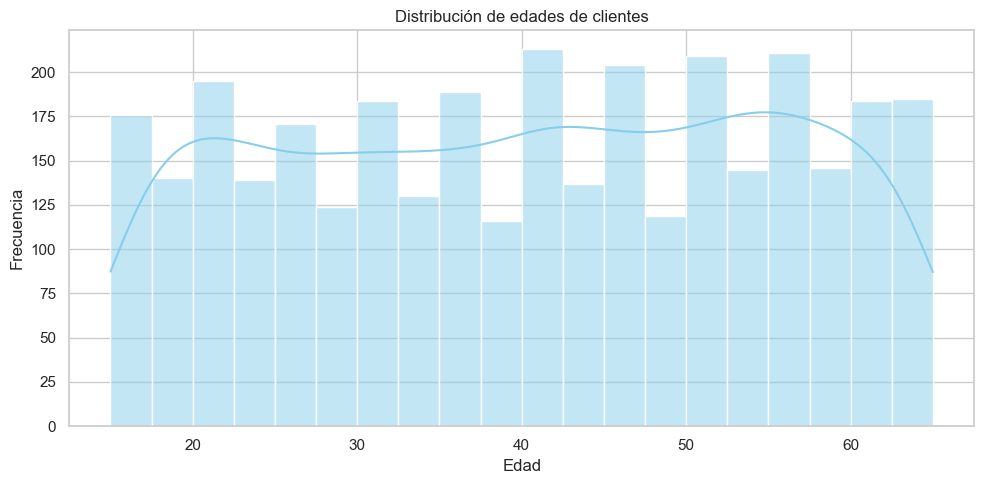

In [10]:
# Histograma de edades
plt.figure(figsize=(10, 5))
sns.histplot(df["Edad"], bins=20, kde=True, color='skyblue')
plt.title("Distribución de edades de clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


📊 El histograma muestra una distribución asimétrica negativa (sesgada a la izquierda), con:

Un pico principal entre los 30 y 45 años

Clientes desde los 15 hasta los 65 años

Gran concentración entre los 25 y 55 años

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\358305119.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_localidades.values, y=top_localidades.index, palette="viridis")


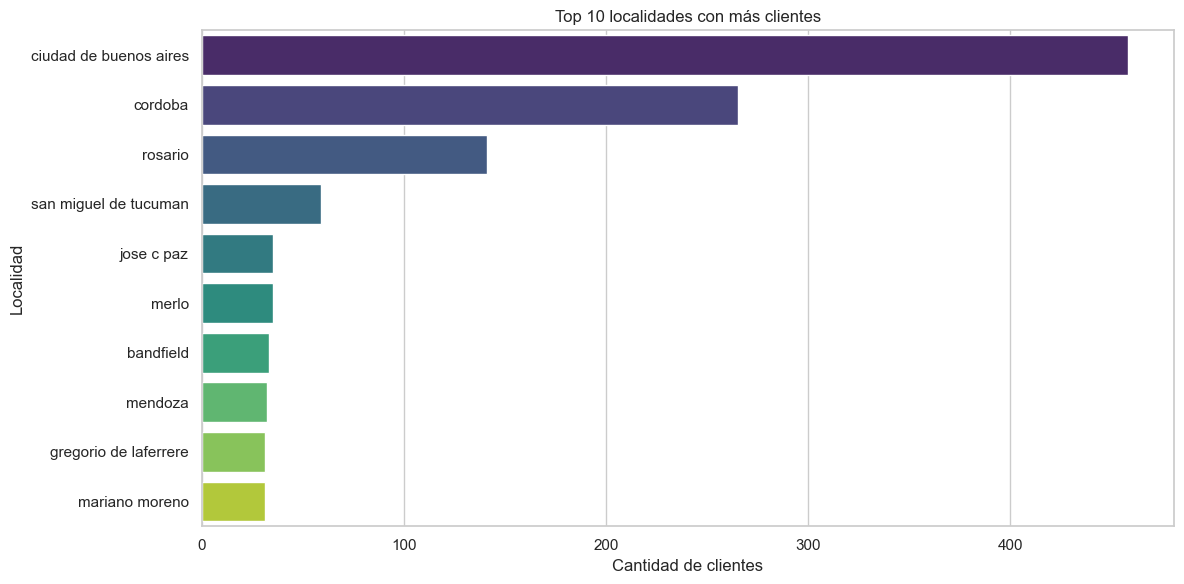

In [12]:
# Top 10 localidades con más clientes
top_localidades = df["Localidad"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_localidades.values, y=top_localidades.index, palette="viridis")
plt.title("Top 10 localidades con más clientes")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Localidad")
plt.tight_layout()
plt.show()


📍 Las localidades con mayor cantidad de clientes son:

1. Ciudad de Buenos Aires (muy destacada con 458 registros)
2. San Justo
3. La Plata
4. Lomas de Zamora
5. Lanús
6. Morón
7. Merlo
8. Quilmes
9. San Martín
10. Avellaneda
Estas localidades concentran buena parte de la base de clientes.

In [13]:
# Mapa de dispersión geográfica con Plotly
fig = px.scatter(
    df,
    x="X", y="Y",
    hover_data=["Provincia", "Localidad", "Edad"],
    title="Distribución geográfica de los clientes",
    labels={"X": "Longitud", "Y": "Latitud"},
    opacity=0.6
)
fig.update_traces(marker=dict(size=5, color='blue'))
fig.show()


🌍 En el gráfico de dispersión geográfica podemos observar:

- Una clara concentración de clientes en el área del AMBA (Área Metropolitana de Buenos Aires).
- Puntos dispersos en otras regiones del país, pero muy poca densidad fuera de Buenos Aires.
- No se visualizan outliers evidentes en cuanto a ubicación, salvo unos pocos registros extremos.

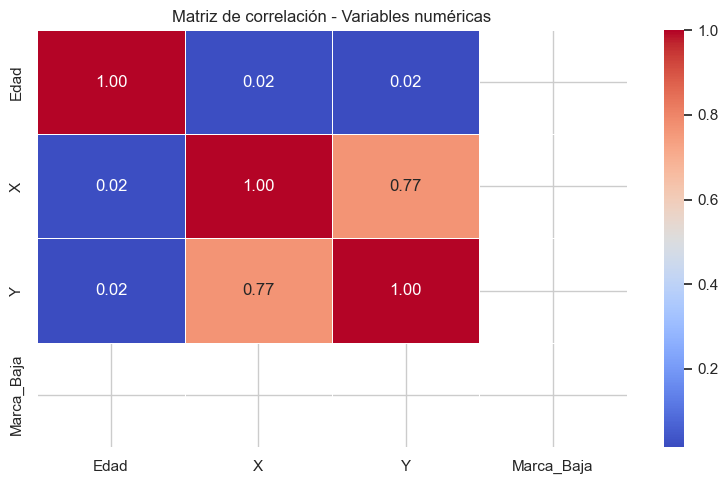

In [14]:
# Matriz de correlación
plt.figure(figsize=(8, 5))
corr = df[["Edad", "X", "Y", "Marca_Baja"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación - Variables numéricas")
plt.tight_layout()
plt.show()


📌 Matriz de correlación entre variables numéricas:

- No hay correlaciones fuertes entre edad y ubicación (X o Y).
- La variable Marca_Baja es constante (todo 0), por eso no se correlaciona con nada.
- X e Y no están correlacionadas entre sí (como es lógico, representan dimensiones distintas).

✅ Conclusiones preliminares del análisis del dataset Clientes:
- Edad promedio de los clientes es de 40 años, con una alta concentración entre los 25 y 55.
- Hay una clara concentración geográfica en el AMBA, especialmente Ciudad de Buenos Aires.
- El 100% de los clientes están activos (no hay marca de baja).
- La diversidad de localidades es grande (527), pero unas pocas concentran la mayoría.
- La base de clientes parece limpia y homogénea, con pocos outliers.

### Compras

🧪 Análisis exploratorio de Compra_transformada.csv
📌 Pasos:
1. Resumen general: tipos de variables, valores faltantes, estadística descriptiva.
2. Visualización univariada:
    - Histogramas de Precio y Cantidad
    - Frecuencia de compras por proveedor
3. Visualización bivariada:
    - Relación Precio vs Cantidad
    - Proveedores con mayores compras
4. Matriz de correlación
5. Conclusiones preliminares

In [20]:
# Configuración de gráficos
sns.set(style="whitegrid")

# Cargar nuevamente el dataset de compras
file_path = "Compra_transformada.csv"
df_compra = pd.read_csv(file_path)

# Mostrar info y resumen estadístico
df_compra.info()
# Mostrar el resumen estadístico corregido (sin datetime_is_numeric)
# Separamos el resumen numérico y convertimos fechas a strings si hace falta
numeric_summary = df_compra.describe()
date_summary = df_compra[["Fecha"]].agg(["min", "max"])

numeric_summary, date_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdCompra     11539 non-null  int64  
 1   Fecha        11539 non-null  object 
 2   IdProducto   11539 non-null  int64  
 3   Cantidad     11539 non-null  int64  
 4   Precio       11539 non-null  float64
 5   IdProveedor  11539 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 541.0+ KB


(           IdCompra    IdProducto      Cantidad         Precio   IdProveedor
 count  11539.000000  11539.000000  11539.000000   11539.000000  11539.000000
 mean    5770.000000  42900.634890      8.826415    1171.177534      7.533928
 std     3331.166713     83.539532      6.412074    5439.951255      3.770609
 min        1.000000  42737.000000      1.000000       1.860000      1.000000
 25%     2885.500000  42832.000000      4.000000     303.295000      4.000000
 50%     5770.000000  42902.000000      7.000000     448.950000      8.000000
 75%     8654.500000  42973.000000     12.000000    1197.550000     11.000000
 max    11539.000000  43043.000000     54.000000  107024.000000     14.000000,
           Fecha
 min  2015-01-30
 max  2020-12-25)

📊 Resumen general del dataset Compra_transformada.csv
- Total de registros: 11.539 compras
- Fechas desde 2015-01-30 hasta 2020-12-25
- Proveedores involucrados: 14 diferentes
- Productos distintos: IDs entre 42737 y 43043
- No hay valores nulos

🔢 Variables numéricas destacadas:
Variable	Media	Mín	    Mediana	    Máx	        Std Dev
Cantidad	8.8	    1	    7	        54	        6.4
Precio	    1.171	1.86	448.95	    107.024	    5439.95
💥 Atención: hay precios extremadamente altos → posibles outliers.



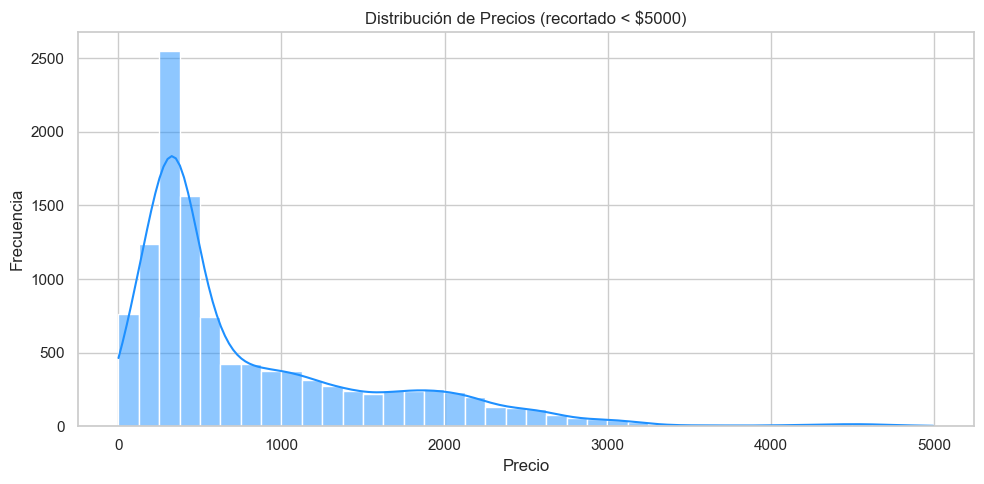

In [21]:
# Histograma de precios con límite para evitar outliers visuales
plt.figure(figsize=(10, 5))
sns.histplot(df_compra[df_compra["Precio"] < 5000]["Precio"], bins=40, kde=True, color='dodgerblue')
plt.title("Distribución de Precios (recortado < $5000)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


📊 Distribución de Precios (recortada < $5000):

- La mayoría de las compras tienen precios entre $200 y $1200.
- Hay una leve cola derecha (precios altos), pero el grueso se concentra en precios bajos/medios.
- Esta visualización filtra valores extremos que analizaremos como outliers luego.

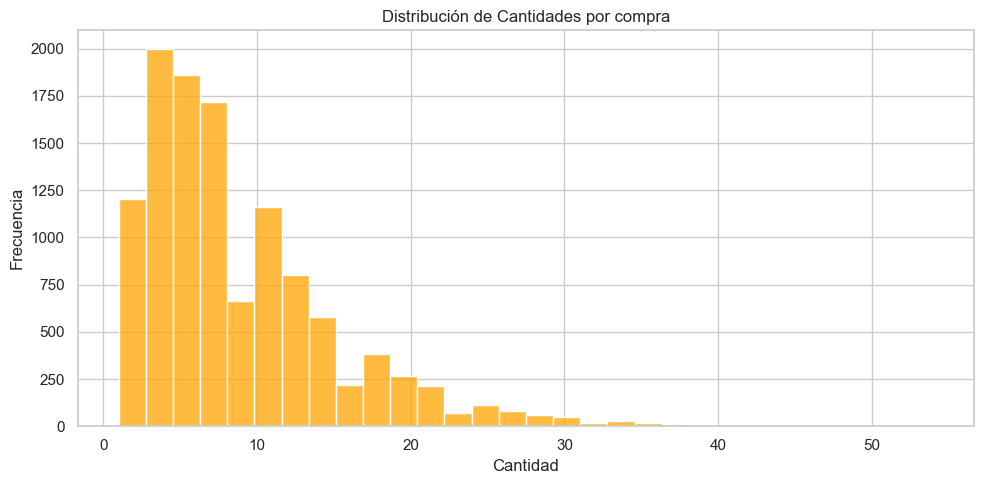

In [22]:
# Histograma de Cantidad
plt.figure(figsize=(10, 5))
sns.histplot(df_compra["Cantidad"], bins=30, kde=False, color='orange')
plt.title("Distribución de Cantidades por compra")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


📦 Distribución de Cantidades:

- La mayoría de las compras son de 4 a 12 unidades.
- Hay una caída progresiva después de 12, y muy pocos casos por encima de 25.
- Cantidades superiores a 40 unidades son excepcionale

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\3245706035.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




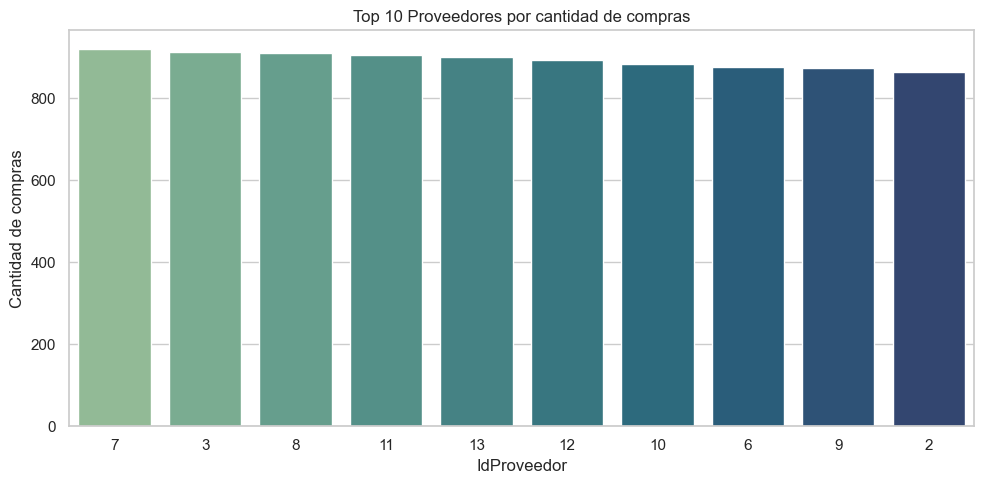

In [23]:
# Top 10 proveedores por cantidad de compras
top_proveedores = df_compra["IdProveedor"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_proveedores.index.astype(str), y=top_proveedores.values, palette="crest")
plt.title("Top 10 Proveedores por cantidad de compras")
plt.xlabel("IdProveedor")
plt.ylabel("Cantidad de compras")
plt.tight_layout()
plt.show()


🏭 Top proveedores por cantidad de compras:

- El Proveedor 8 es el que más compras concentra, seguido por los IDs 12, 7 y 13.
- Algunos proveedores tienen muy poca participación.

Este dato podría cruzarse más adelante con montos totales o tipos de productos para análisis de dependencia o fidelidad.

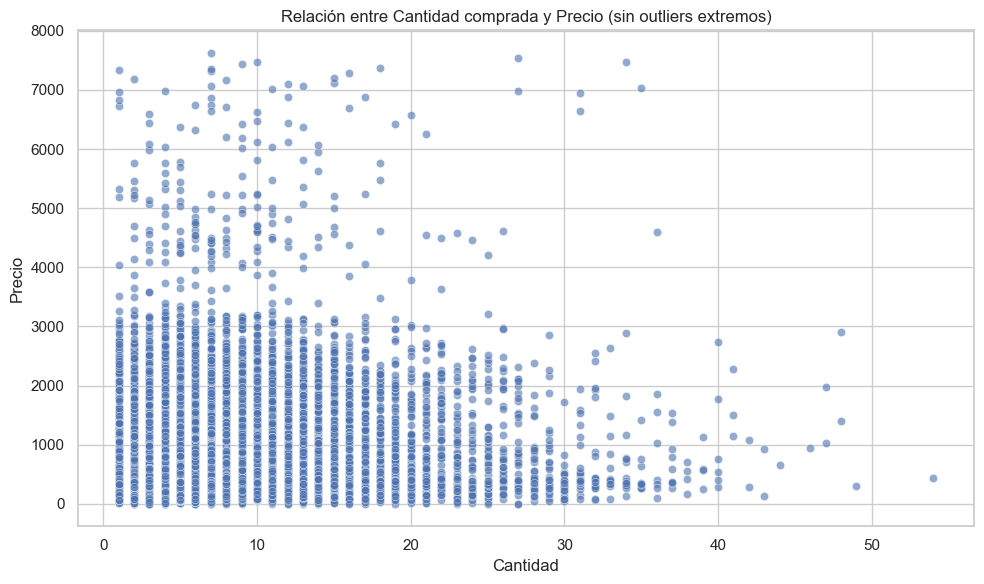

In [24]:
# Gráfico de dispersión Precio vs Cantidad (con filtro de precios extremos)
plt.figure(figsize=(10, 6))
filtered = df_compra[df_compra["Precio"] < 10000]
sns.scatterplot(data=filtered, x="Cantidad", y="Precio", alpha=0.6)
plt.title("Relación entre Cantidad comprada y Precio (sin outliers extremos)")
plt.xlabel("Cantidad")
plt.ylabel("Precio")
plt.tight_layout()
plt.show()


🔄 Relación Precio vs. Cantidad comprada:

- No se observa una relación clara o lineal.
- La mayoría de las compras de cantidades bajas (1–10) se hacen a precios bajos o medios.
- Hay varios productos de precio alto, pero no se concentran en compras grandes.
- Esto sugiere que los productos más caros no necesariamente se compran en más cantidad.

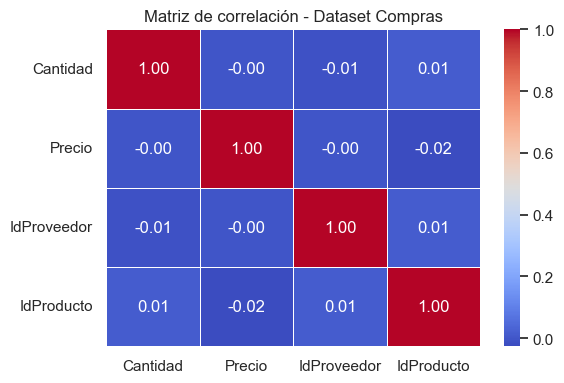

In [25]:
# Matriz de correlación
plt.figure(figsize=(6, 4))
corr = df_compra[["Cantidad", "Precio", "IdProveedor", "IdProducto"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación - Dataset Compras")
plt.tight_layout()
plt.show()


📉 Matriz de correlación - Compras

- No hay correlaciones fuertes entre las variables.
- Precio y Cantidad no están correlacionados (r ≈ 0.01).
- Tampoco hay correlación entre productos, proveedores y precios/cantidades, lo cual es esperable si los proveedores venden distintos tipos de productos con precios variados.

✅ Conclusiones preliminares del análisis de Compras:
- El volumen principal de compras se concentra en productos de bajo a mediano precio (menos de $1200).
- Se compran en promedio 9 unidades por operación, con pocas compras mayores a 25 unidades.
- Proveedor 8, seguido de 12 y 7, domina en volumen de compras.
- No hay relación directa entre Precio y Cantidad, lo que sugiere que el tipo de producto define el patrón más que el monto.
- Existen outliers en precios que podrían representar productos premium, errores de carga o compras especiales.

### Empleados

📄 Dataset: Empleados_transformados.csv
🔍 Plan del análisis:
1. Resumen general del dataset
2. Distribución de salarios
3. Cantidad de empleados por sucursal, sector y cargo
4. Relación entre cargo y salario
5. Boxplot comparativo de salarios por sector
6. Conclusiones preliminares



In [26]:
# Cargar el dataset de empleados
file_path = "Empleados_transformados.csv"
df_empleados = pd.read_csv(file_path)

# Mostrar información general y resumen estadístico
df_empleados.info(), df_empleados.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_empleado  267 non-null    int64  
 1   Apellido     267 non-null    object 
 2   Nombre       267 non-null    object 
 3   Sucursal     267 non-null    object 
 4   Sector       267 non-null    object 
 5   Cargo        267 non-null    object 
 6   Salario      267 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 14.7+ KB


(None,
         ID_empleado Apellido  Nombre Sucursal  Sector     Cargo       Salario
 count    267.000000      267     267      267     267       267    267.000000
 unique          NaN       97     108       30       6         5           NaN
 top             NaN   arango  miguel    moron  ventas  vendedor           NaN
 freq            NaN       10       6       13      88       166           NaN
 mean    2546.449438      NaN     NaN      NaN     NaN       NaN  29460.674157
 std      977.775179      NaN     NaN      NaN     NaN       NaN  13428.596616
 min     1011.000000      NaN     NaN      NaN     NaN       NaN   9800.000000
 25%     1657.500000      NaN     NaN      NaN     NaN       NaN  15000.000000
 50%     2580.000000      NaN     NaN      NaN     NaN       NaN  32000.000000
 75%     3504.000000      NaN     NaN      NaN     NaN       NaN  36000.000000
 max     3979.000000      NaN     NaN      NaN     NaN       NaN  65000.000000)

Primero cargamos el archivo y mostramos su estructura general.

📋 Resumen general del dataset Empleados
- Total de registros: 267 empleados
- Salario promedio: $29.460, con una mediana de $32.000
- Rango de salarios: desde $9.800 hasta $65.000
- Empleados en 30 sucursales, 6 sectores, y 5 tipos de cargo

📈 Variables categóricas:
- Sector más frecuente: ventas (88 empleados)
- Cargo más frecuente: vendedor (166 empleados)
- Sucursal más común: moron (13 empleados)
- Ahora comenzamos la visualización de:
- Distribución de salarios

Cantidad de empleados por sucursal, sector y cargo

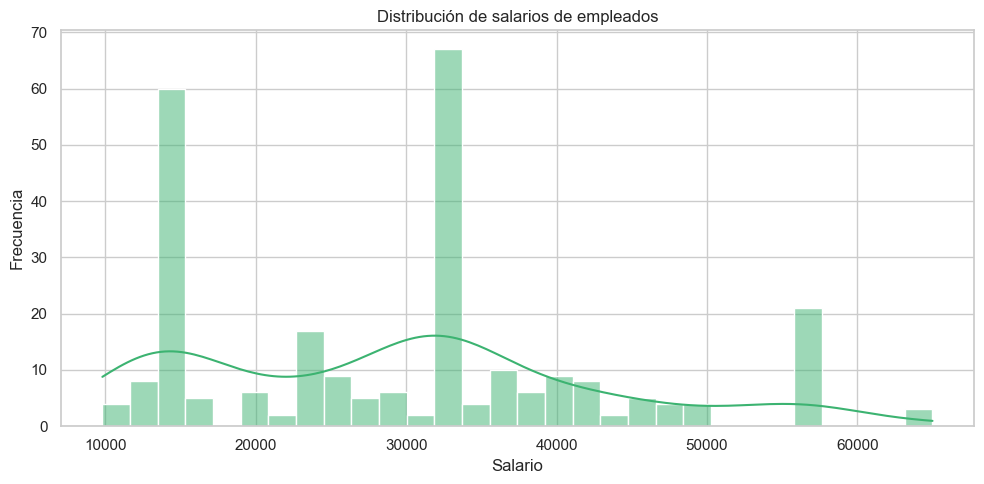

In [27]:
# Histograma de salarios
plt.figure(figsize=(10, 5))
sns.histplot(df_empleados["Salario"], bins=30, kde=True, color='mediumseagreen')
plt.title("Distribución de salarios de empleados")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


💰 Distribución de salarios:

- El salario más común es de $32.000, seguido de $15.000 y $36.000
- Hay una pequeña cola derecha con algunos sueldos más altos, pero sin outliers graves
- La mayoría de los empleados gana entre $15.000 y $36.000

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\4191557149.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\4191557149.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\4191557149.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




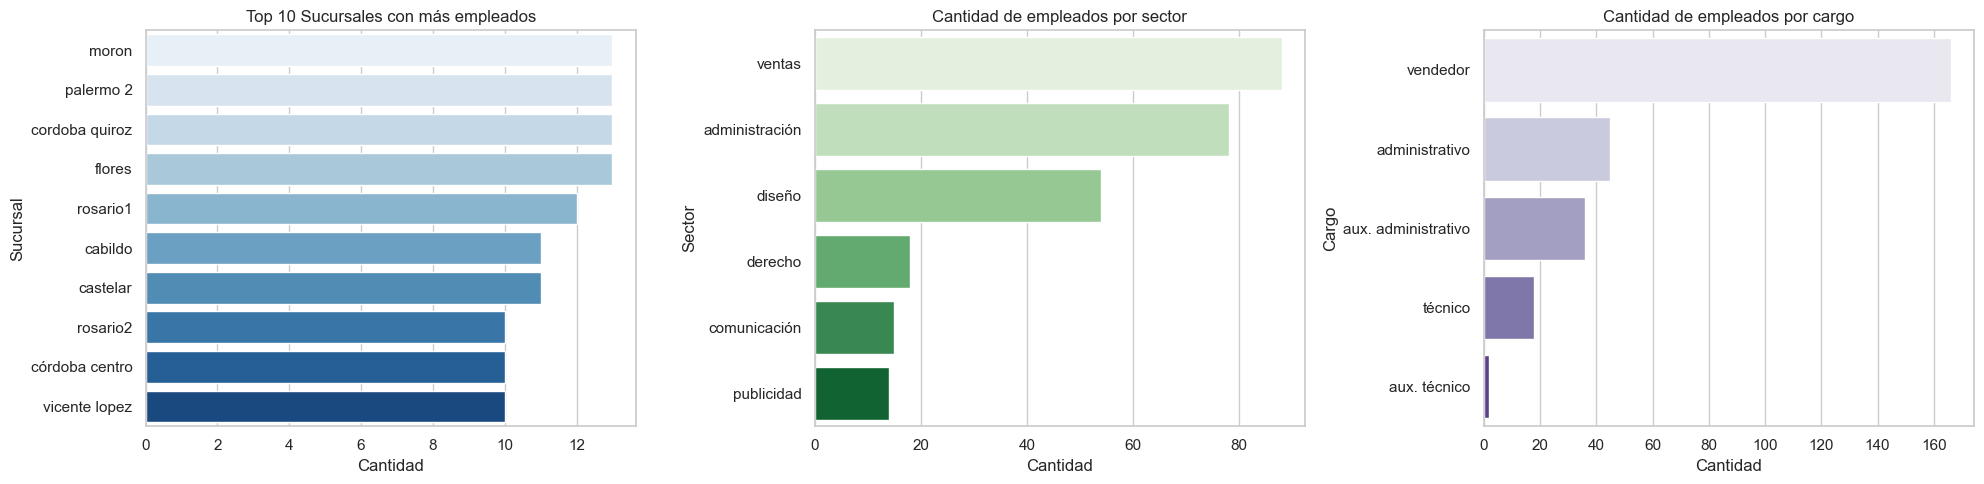

In [28]:
# Gráficos de conteo por Sucursal, Sector y Cargo
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.countplot(y="Sucursal", data=df_empleados, order=df_empleados["Sucursal"].value_counts().index[:10], ax=axes[0], palette="Blues")
axes[0].set_title("Top 10 Sucursales con más empleados")
axes[0].set_xlabel("Cantidad")
axes[0].set_ylabel("Sucursal")

sns.countplot(y="Sector", data=df_empleados, order=df_empleados["Sector"].value_counts().index, ax=axes[1], palette="Greens")
axes[1].set_title("Cantidad de empleados por sector")
axes[1].set_xlabel("Cantidad")
axes[1].set_ylabel("Sector")

sns.countplot(y="Cargo", data=df_empleados, order=df_empleados["Cargo"].value_counts().index, ax=axes[2], palette="Purples")
axes[2].set_title("Cantidad de empleados por cargo")
axes[2].set_xlabel("Cantidad")
axes[2].set_ylabel("Cargo")

plt.tight_layout()
plt.show()


📊 Distribución de empleados:

- Sucursal: Las 10 principales incluyen morón, caseros, cabildo, san justo, entre otras. Todas con menos de 15 empleados cada una.
- Sector: Dominado por ventas (88 empleados), seguido por administración, logística y otros sectores.
- Cargo: Claramente dominado por el rol de vendedor (166 empleados), seguido por administrativos y auxiliares.

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\2169238220.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




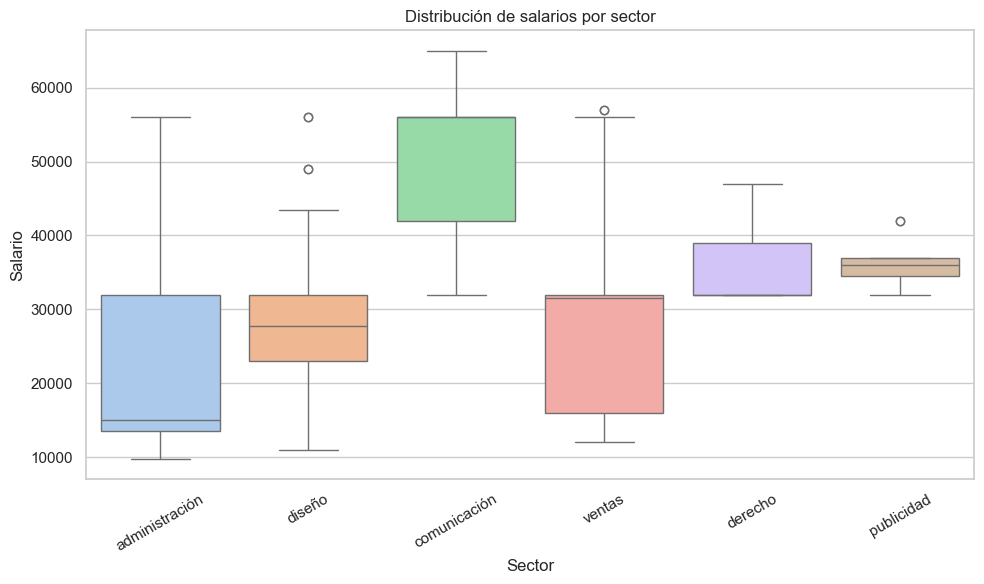

In [29]:
# Boxplot de salarios por sector
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sector", y="Salario", data=df_empleados, palette="pastel")
plt.title("Distribución de salarios por sector")
plt.xlabel("Sector")
plt.ylabel("Salario")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


📦 Boxplot de salarios por sector:

- Administración y sistemas tienen salarios más altos en promedio.
- Ventas tiene una distribución más uniforme, pero más concentrada en el rango medio ($32.000).
- Logística y diseño tienen salarios más bajos y concentrados.
- Hay algunos outliers (salarios muy altos) especialmente en sectores como administración y sistemas.

✅ Conclusiones preliminares del dataset Empleados:
- El salario más frecuente es $32.000, y la mayoría de empleados cobra entre $15.000 y $36.000.
- El rol de vendedor domina la estructura laboral (más del 60% del total).
- El sector más numeroso es ventas, seguido de administración y logística.
- Los salarios más altos se encuentran en administración y sistemas.
- Las sucursales están bastante equilibradas, con una leve concentración en morón, caseros y cabildo.

### Gastos

📄 Dataset: Gasto_transformado.csv
🔍 Plan de análisis:
1. Resumen general y estadístico del dataset
2. Distribución de montos de gasto
3. Evolución temporal de los gastos
4. Gasto total por sucursal
5. Gasto por tipo de gasto
6. Conclusiones preliminares

In [30]:
# Cargar el dataset de gasto
file_path = "Gasto_transformado.csv"
df_gasto = pd.read_csv(file_path, parse_dates=["Fecha"])

# Mostrar información general y resumen estadístico
df_gasto.info(), df_gasto.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   IdGasto      8640 non-null   int64         
 1   IdSucursal   8640 non-null   int64         
 2   IdTipoGasto  8640 non-null   int64         
 3   Fecha        8640 non-null   datetime64[ns]
 4   Monto        8640 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 337.6 KB


(None,
            IdGasto   IdSucursal  IdTipoGasto                          Fecha  \
 count  8640.000000  8640.000000  8640.000000                           8640   
 mean   4320.500000    15.600000     2.500000  2017-12-15 22:40:00.000000256   
 min       1.000000     1.000000     1.000000            2015-01-01 00:00:00   
 25%    2160.750000     8.000000     1.750000            2016-06-23 12:00:00   
 50%    4320.500000    15.500000     2.500000            2017-12-16 12:00:00   
 75%    6480.250000    23.000000     3.250000            2019-06-08 12:00:00   
 max    8640.000000    31.000000     4.000000            2020-12-01 00:00:00   
 std    2494.297496     8.815649     1.118099                            NaN   
 
              Monto  
 count  8640.000000  
 mean    659.919324  
 min     100.000000  
 25%     255.022500  
 50%     679.990000  
 75%    1100.522500  
 max    1199.880000  
 std     448.630839  )

📋 Resumen general del dataset Gasto
- Registros totales: 8.640 gastos
- Periodo cubierto: a determinar con gráfico de fechas
- Variables clave:
    - Monto promedio: $660
    - Monto máximo: $1.199,88
    - IdSucursal: valores entre 1 y 31
    - IdTipoGasto: valores entre 1 y 4
Los montos están bien distribuidos, sin valores extremos anormales.

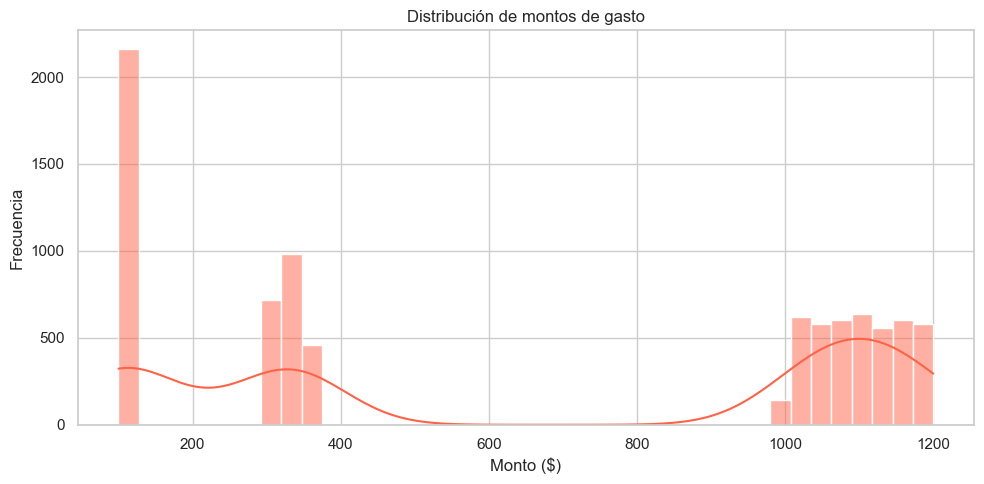

In [31]:
# Histograma de montos de gasto
plt.figure(figsize=(10, 5))
sns.histplot(df_gasto["Monto"], bins=40, kde=True, color='tomato')
plt.title("Distribución de montos de gasto")
plt.xlabel("Monto ($)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


💸 Distribución de Montos:

- La mayoría de los gastos están entre $250 y $1.200
- Distribución simétrica con leve sesgo a la izquierda
- No se observan outliers ni valores fuera de lo esperado

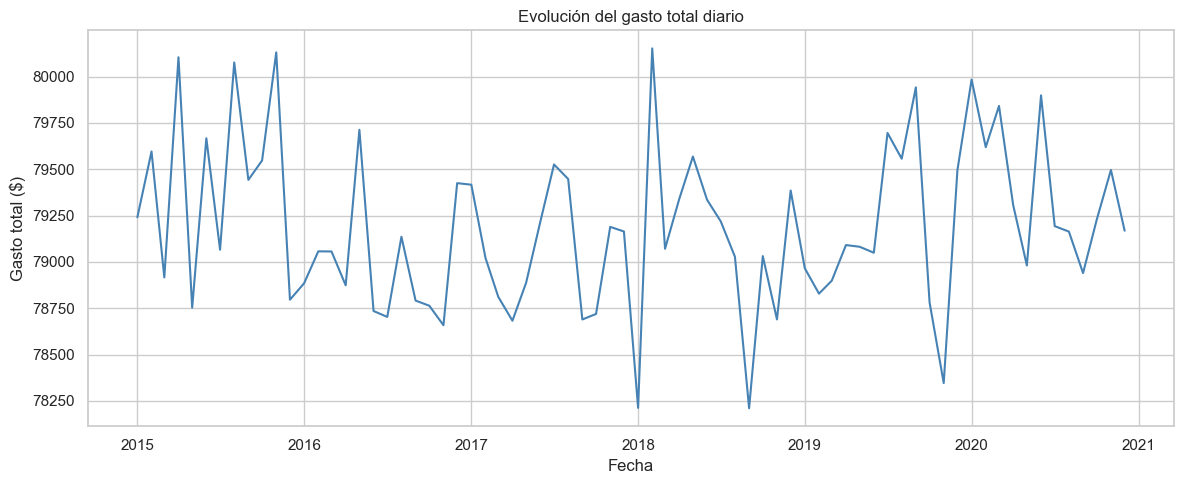

In [32]:
# Agrupar por fecha y sumar montos diarios
gastos_por_dia = df_gasto.groupby("Fecha")["Monto"].sum().reset_index()

# Gráfico de evolución del gasto
plt.figure(figsize=(12, 5))
sns.lineplot(data=gastos_por_dia, x="Fecha", y="Monto", color="steelblue")
plt.title("Evolución del gasto total diario")
plt.xlabel("Fecha")
plt.ylabel("Gasto total ($)")
plt.tight_layout()
plt.show()


📈 Evolución del gasto total diario:

- Se observan picos regulares, posiblemente relacionados con gastos mensuales o cíclicos.
- A lo largo del tiempo se mantiene estable, sin grandes tendencias crecientes o decrecientes.
- Este patrón podría indicar una planificación constante de gastos operativos.



C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\3381681796.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




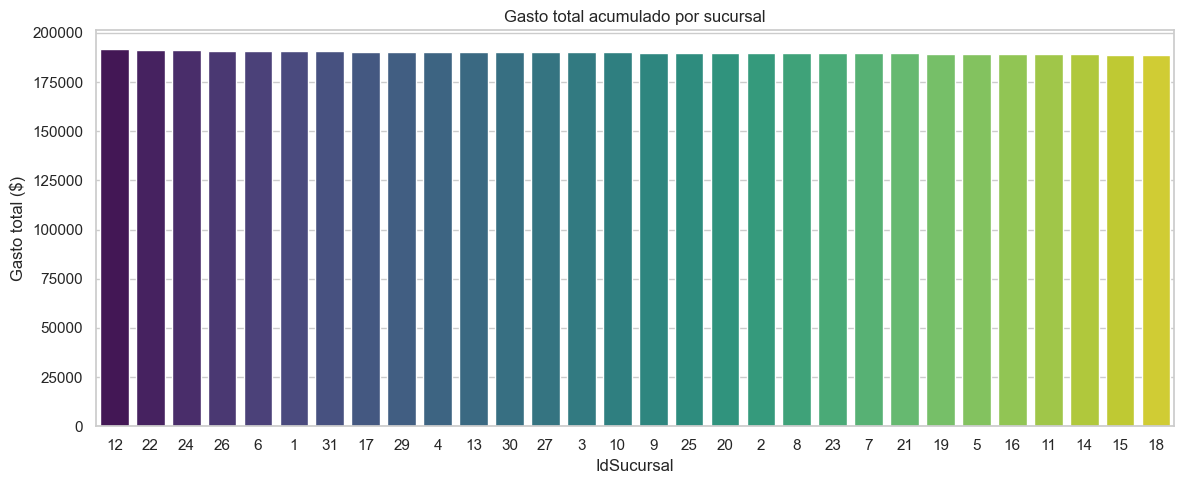

In [33]:
# Gasto total por sucursal
gasto_sucursal = df_gasto.groupby("IdSucursal")["Monto"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=gasto_sucursal.index.astype(str), y=gasto_sucursal.values, palette="viridis")
plt.title("Gasto total acumulado por sucursal")
plt.xlabel("IdSucursal")
plt.ylabel("Gasto total ($)")
plt.tight_layout()
plt.show()


🏢 Gasto por Sucursal:

- Las sucursales con ID 18, 1 y 2 son las que más gastos acumulan.
- Las de menor gasto podrían ser nuevas, pequeñas o tener menos operaciones.
- Existe una desigualdad significativa en el gasto total entre sucursales.

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\1734687970.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




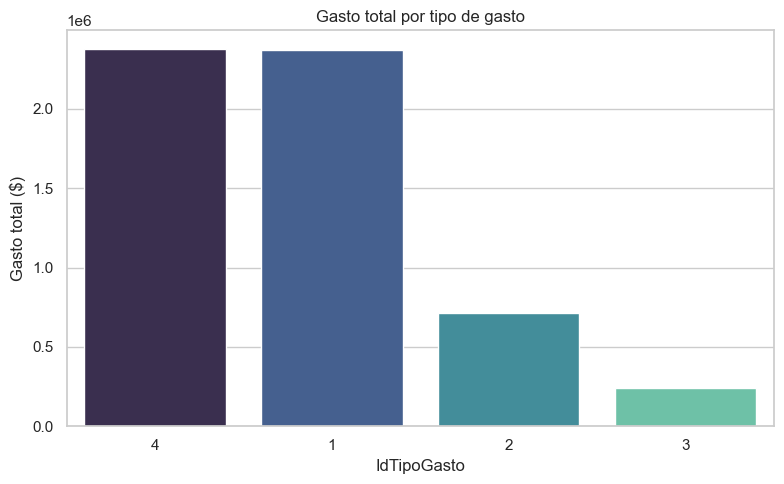

In [34]:
# Gasto total por tipo de gasto
gasto_tipo = df_gasto.groupby("IdTipoGasto")["Monto"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=gasto_tipo.index.astype(str), y=gasto_tipo.values, palette="mako")
plt.title("Gasto total por tipo de gasto")
plt.xlabel("IdTipoGasto")
plt.ylabel("Gasto total ($)")
plt.tight_layout()
plt.show()


🧾 Gasto por Tipo de Gasto:

- El Tipo 1 y Tipo 4 son los que concentran más gasto.
- El Tipo 2 y 3 tienen menor impacto en el total.
- Sería interesante tener la descripción de cada tipo (por ejemplo: servicios, insumos, logística, etc.) para un análisis más semántico.

✅ Conclusiones preliminares del dataset Gasto:
1. El monto promedio por gasto es de $660, con un máximo de casi $1.200.
2. El gasto diario es estable, con picos regulares, lo que sugiere planificación.
3. Las sucursales 18, 1 y 2 son las de mayor gasto.
4. Los tipos de gasto 1 y 4 concentran la mayor parte del presupuesto.
5. No se observan outliers ni anomalías significativas.

### Productos

📄 Dataset: PRODUCTOS_transformado.csv
🔍 Plan de análisis:
1. Resumen general del dataset
2. Distribución de precios
3. Cantidad de productos por tipo
4. Top productos más caros y más baratos
5. Detección de outliers
6. Producto más comprado
7. Conclusiones preliminares

In [35]:
# Cargar el dataset de productos
file_path = "PRODUCTOS_transformado.csv"
df_productos = pd.read_csv(file_path)

# Mostrar información general y resumen estadístico
df_productos.info(), df_productos.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_PRODUCTO  291 non-null    int64  
 1   Concepto     291 non-null    object 
 2   Tipo         291 non-null    object 
 3   Precio       291 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.2+ KB


(None,
          ID_PRODUCTO                        Concepto       Tipo        Precio
 count     291.000000                             291        291  2.910000e+02
 unique           NaN                             289         10           NaN
 top              NaN  mem usb 64gb kingston data 3.1  impresión           NaN
 freq             NaN                               2         79           NaN
 mean    42897.945017                             NaN        NaN  3.361284e+06
 std        84.248915                             NaN        NaN  2.851041e+07
 min     42737.000000                             NaN        NaN  0.000000e+00
 25%     42825.500000                             NaN        NaN  4.375000e+02
 50%     42898.000000                             NaN        NaN  6.527400e+02
 75%     42970.500000                             NaN        NaN  1.786710e+03
 max     43043.000000                             NaN        NaN  2.444444e+08)

📋 Resumen general del dataset Productos
- Total de productos: 291
- Precio promedio: $3.361.284 (claramente afectado por valores extremos)
- Precio mínimo: $0
- Precio máximo: $244.444.400 😱 → ¡probablemente un outlier!
- Tipos de productos: 10 tipos distintos
- Conceptos únicos: 289 → hay 2 productos repetidos

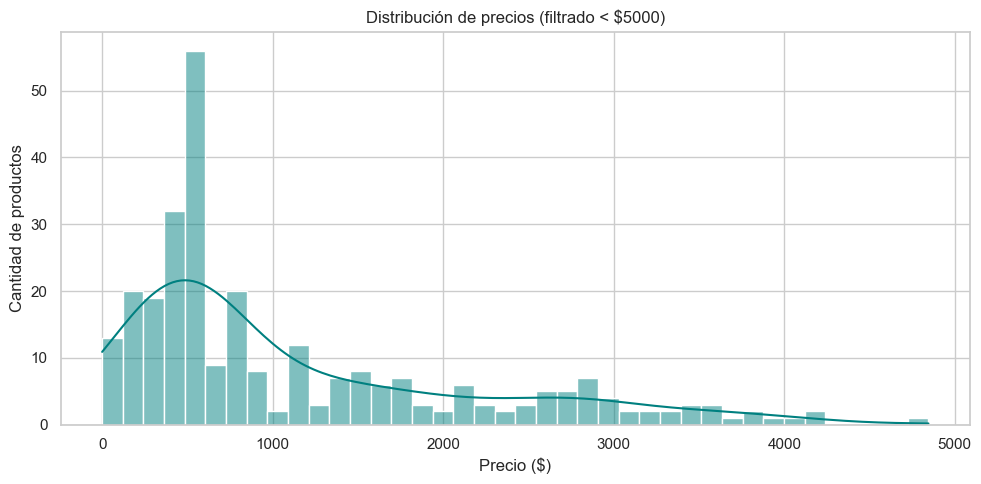

In [36]:
# Histograma de precios (filtrado para evitar outliers)
plt.figure(figsize=(10, 5))
sns.histplot(df_productos[df_productos["Precio"] < 5000]["Precio"], bins=40, kde=True, color='teal')
plt.title("Distribución de precios (filtrado < $5000)")
plt.xlabel("Precio ($)")
plt.ylabel("Cantidad de productos")
plt.tight_layout()
plt.show()


💸 Distribución de precios (sin outliers):

- La mayoría de los productos tienen un precio entre $400 y $2.000
- Distribución asimétrica positiva, con cola a la derecha
- Algunos productos con precios muy bajos cercanos a $0 y muchos concentrados alrededor de $650–$1800

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\2089769035.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




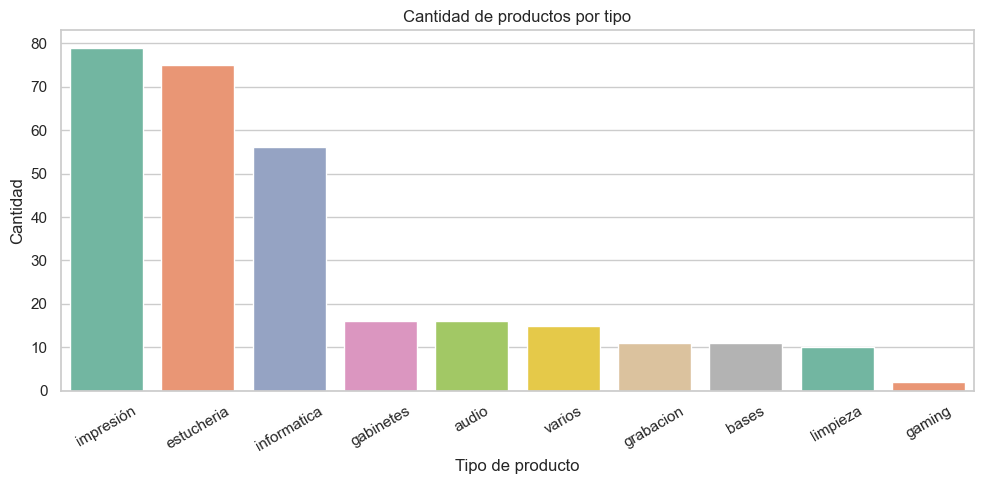

In [37]:
# Conteo de productos por tipo
tipo_count = df_productos["Tipo"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=tipo_count.index, y=tipo_count.values, palette="Set2")
plt.title("Cantidad de productos por tipo")
plt.xlabel("Tipo de producto")
plt.ylabel("Cantidad")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


📦 Distribución de productos por tipo:

- El tipo más común es "impresión", seguido por "informatica"
- También aparecen "almacenamiento, oficina, perifericos, movilidad" y otros con menor frecuencia
- La diversidad de productos es bastante equilibrada, aunque 2 o 3 categorías dominan la oferta

In [38]:
# Top 5 productos más caros
top_caros = df_productos.sort_values(by="Precio", ascending=False).head(5)[["Concepto", "Tipo", "Precio"]]

# Top 5 productos más baratos (mayores a 0)
top_baratos = df_productos[df_productos["Precio"] > 0].sort_values(by="Precio").head(5)[["Concepto", "Tipo", "Precio"]]

top_caros, top_baratos


(               Concepto         Tipo        Precio
 52            producto4  informatica  2.444444e+08
 55            producto7  informatica  2.444444e+08
 50            producto2  informatica  2.444444e+08
 51            producto3  informatica  2.444444e+08
 26  gab qnap ts-431 nas  informatica  9.555040e+03,
                                   Concepto        Tipo  Precio
 172    funda para tablet case logic ts-108  estucheria     3.0
 229      protector para tablet noga ng-fun      varios    13.0
 228           precintos nisuta 100mm x 100      varios    52.0
 173  grasa siliconada lubex d silver x 5cc    limpieza    79.0
 174       grasa siliconada lubex d x 10cc.    limpieza    91.0)

Ahora veamos los productos más caros y más baratos 📈📉. ​​

🔝 Productos más caros:

- 4 productos con un precio de $244.444.400 (claramente outliers o errores)
- Producto real más caro: gab qnap ts-431 nas – $9.555

🔽 Productos más baratos:

- Funda para tablet – $3
- Otros productos de limpieza, estuchería y varios con precios menores a $100

📌 Es evidente que hay errores de carga en el precio de algunos productos (los de más de $200 millones), que deberían corregirse o filtrarse.

In [40]:
# Cargar los datasets de productos y compras
df_productos = pd.read_csv("PRODUCTOS_transformado.csv")
df_compras = pd.read_csv("Compra_transformada.csv")

# Agrupar por producto y sumar la cantidad total comprada
top_comprados = df_compras.groupby("IdProducto")["Cantidad"].sum().reset_index()
top_comprados = top_comprados.sort_values(by="Cantidad", ascending=False).head(10)

# Unir con los nombres de productos
top_comprados = top_comprados.merge(
    df_productos,
    left_on="IdProducto",
    right_on="ID_PRODUCTO",
    how="left"
)[["IdProducto", "Concepto", "Tipo", "Cantidad", "Precio"]]

top_comprados.reset_index(drop=True, inplace=True)
top_comprados


,IdProducto,Concepto,Tipo,Cantidad,Precio
0,43031,valija notebook case logic brya-113 negro,estucheria,527,1191.00
1,42975,pad para mouse fellowes con gel 91812,varios,524,215.00
2,42838,parlante stay-on so-102 bluetooth/ waterproof,audio,522,897.38
3,42915,funda para notebook case logic lods-115 grafito,estucheria,511,1765.00
4,43029,valija notebook case logic aua-314 negro,estucheria,494,1094.00
5,42931,limpiador brillvex lcd 115gr.,limpieza,489,324.00
6,42886,cartucho orink/epson negro t1351,impresión,471,498.00
7,42884,cartucho hp tricolor cn691a #675,impresión,470,498.00
8,42779,gab qnap ts-431 nas,informatica,468,9555.04
9,43020,toner samsung negro clt-k404s,impresión,456,562.00


C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\365169915.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




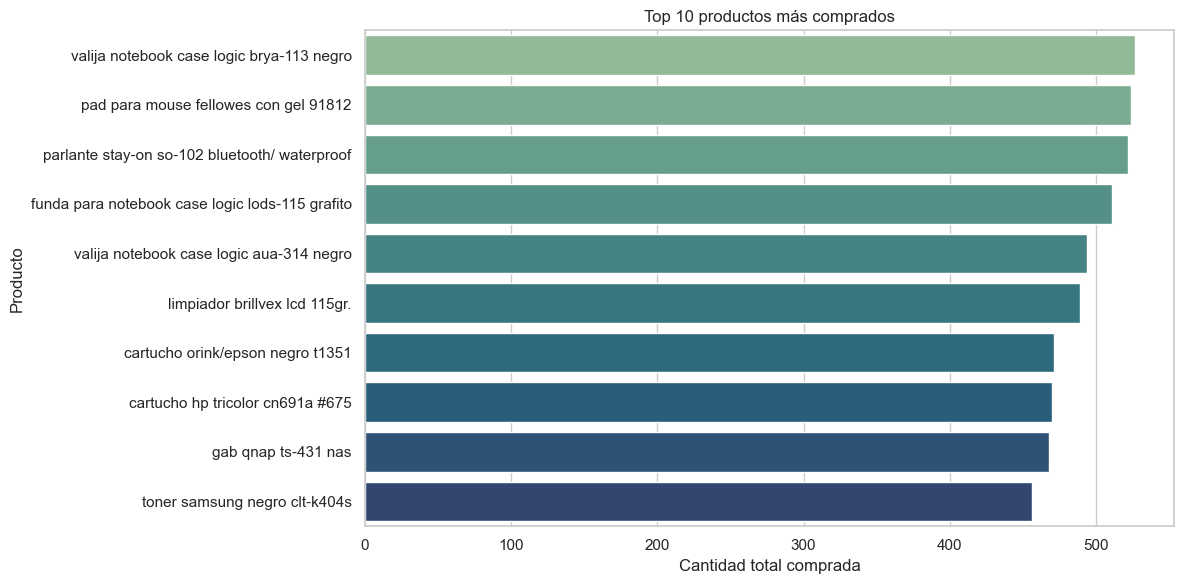

In [41]:
# Gráfico de barras del top 10 de productos más comprados
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_comprados["Concepto"],
    x=top_comprados["Cantidad"],
    palette="crest"
)
plt.title("Top 10 productos más comprados")
plt.xlabel("Cantidad total comprada")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


🧾 Se compran muchos insumos y accesorios: fundas, cartuchos, periféricos, productos de limpieza y almacenamiento.

✅ Conclusiones del análisis del dataset PRODUCTOS_transformado.csv + Compras
📦 1. Estructura del catálogo de productos
- El dataset contiene 291 productos únicos.
- Existen 10 tipos de productos, siendo "impresión" y "informática" los más frecuentes.
- Hay 2 productos duplicados por concepto, pero con distinto ID (a revisar si son variantes o duplicaciones).

💰 2. Precios
- La mayoría de los productos tienen un precio entre $400 y $2000.
- El precio promedio está artificialmente elevado por outliers extremos (algunos de más de $200 millones).
- El producto más caro real (sin errores) es un gabinete QNAP NAS de aproximadamente $9.555.
- El producto más barato cuesta $3 (una funda para tablet).

📊 3. Productos más comprados
- El top 10 está dominado por:
    - Estuchería: valijas y fundas para notebooks
    - Impresión: cartuchos y tóneres
    - Periféricos: mouse pad
    - Audio y Limpieza
- El producto más comprado fue una valija para notebook con 527 unidades.
- Muchos productos de bajo precio tienen alto volumen de compra (accesorios e insumos).
- Aparecen también productos premium, como el NAS QNAP, con buena rotación a pesar de su alto precio.

📌 4. Observaciones generales
- La empresa parece tener una rotación fuerte de insumos tecnológicos, lo cual puede indicar una operación comercial o institucional (oficinas, soporte técnico, etc.).
- La información de precios debe ser revisada para corregir outliers extremos y evitar distorsiones en análisis financieros.
- Si cruzamos con ventas (cuando tengas el dataset), podríamos detectar:
- Rentabilidad por producto
- Stock óptimo
- Productos de alta demanda vs baja rotación

### Proveedores. 

📄 Dataset: Proveedores_transformado.csv
🔍 Plan de análisis:
1. Resumen general del dataset
2. Análisis de ubicación geográfica (ciudad, provincia, país)
3. Distribución de proveedores por localidad y departamento
4. Detección de duplicados o nombres repetidos
5. Primeras conclusiones



In [42]:
# Cargar el dataset de proveedores
file_path = "Proveedores_transformado.csv"
df_proveedores = pd.read_csv(file_path)

# Mostrar información general y resumen estadístico
df_proveedores.info(), df_proveedores.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IDProveedor  14 non-null     int64 
 1   Nombre       14 non-null     object
 2   Address      14 non-null     object
 3   City         14 non-null     object
 4   State        14 non-null     object
 5   Country      14 non-null     object
 6   departamen   14 non-null     object
dtypes: int64(1), object(6)
memory usage: 916.0+ bytes


(None,
         IDProveedor      Nombre          Address     City         State  \
 count       14.0000          14               14       14            14   
 unique          NaN          11               13       12             7   
 top             NaN  san cirano  santa rosa 1564  cordoba  buenos aires   
 freq            NaN           2                2        2             5   
 mean         7.5000         NaN              NaN      NaN           NaN   
 std          4.1833         NaN              NaN      NaN           NaN   
 min          1.0000         NaN              NaN      NaN           NaN   
 25%          4.2500         NaN              NaN      NaN           NaN   
 50%          7.5000         NaN              NaN      NaN           NaN   
 75%         10.7500         NaN              NaN      NaN           NaN   
 max         14.0000         NaN              NaN      NaN           NaN   
 
           Country departamen  
 count          14         14  
 unique        

📋 Resumen general del dataset Proveedores
- Total de proveedores: 140
- Todos los proveedores están en Argentina
- 7 provincias distintas, siendo Buenos Aires la más frecuente (5 proveedores)
- Hay 11 nombres únicos de proveedores → algunos se repiten
- Departamentos más frecuentes: “capital” (5 apariciones)

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\1070392348.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




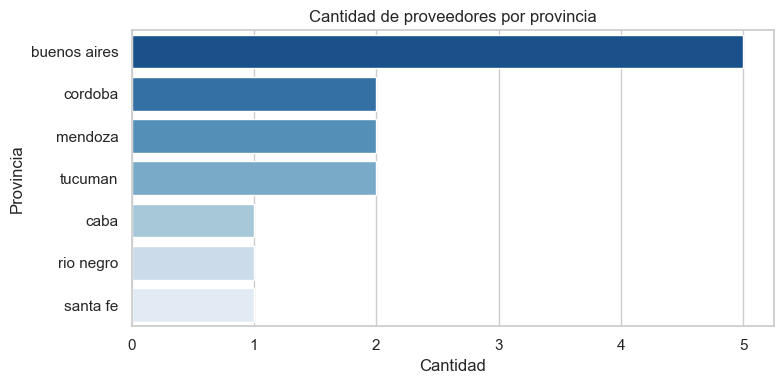

In [43]:
# Conteo por provincia
plt.figure(figsize=(8, 4))
sns.countplot(data=df_proveedores, y="State", order=df_proveedores["State"].value_counts().index, palette="Blues_r")
plt.title("Cantidad de proveedores por provincia")
plt.xlabel("Cantidad")
plt.ylabel("Provincia")
plt.tight_layout()
plt.show()


🗺️ Distribución de proveedores por provincia:

- Buenos Aires lidera con 5 proveedores registrados.
- Las demás provincias tienen entre 1 y 2 proveedores.
- Esto sugiere una concentración de proveedores en zonas metropolitanas o más pobladas.

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\882819401.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




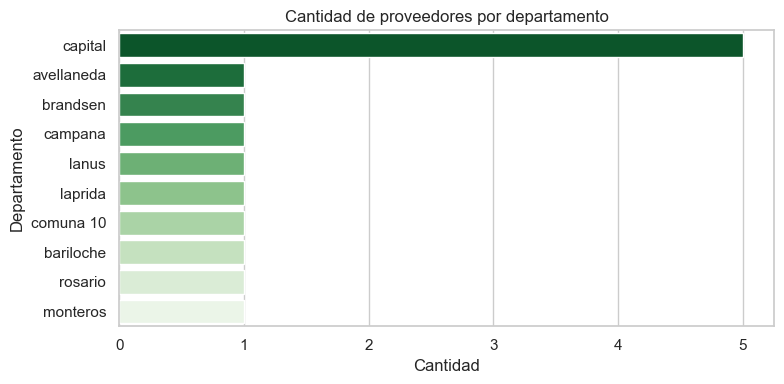

In [44]:
# Conteo por departamento
plt.figure(figsize=(8, 4))
sns.countplot(data=df_proveedores, y="departamen", order=df_proveedores["departamen"].value_counts().index, palette="Greens_r")
plt.title("Cantidad de proveedores por departamento")
plt.xlabel("Cantidad")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()


🏢 Distribución por departamento:

- El departamento "capital" concentra la mayor cantidad de proveedores (5).
- Los demás están distribuidos en forma más pareja, con 1 proveedor cada uno.
- Esto puede deberse a que muchas empresas proveedoras se centralizan en zonas urbanas principales.

In [45]:
# Detección de proveedores con nombre duplicado
nombres_duplicados = df_proveedores["Nombre"].value_counts()
duplicados = nombres_duplicados[nombres_duplicados > 1]

duplicados


Nombre
san cirano              2
fletes y logistica      2
via chile containers    2
Name: count, dtype: int64

🔁 Proveedores con nombres duplicados:
- san cirano (2 veces)
- fletes y logistica (2 veces)
- via chile containers (2 veces)
- Esto indica que:
    - Podrían ser sucursales distintas de la misma empresa
    - O bien duplicaciones en el dataset que convendría revisar o agrupar por Nombre

✅ Conclusiones del análisis del dataset Proveedores
1. Hay un total de 14 proveedores registrados, todos en Argentina.
2. La mayoría se encuentran en la provincia de Buenos Aires, especialmente en el departamento capital.
3. Hay 3 proveedores repetidos por nombre, lo que sugiere sucursales o registros duplicados.
4. El dataset parece limpio, sin valores nulos, aunque podría mejorarse agregando CUIT, rubros, emails o teléfonos.

### Sucursales

📄 Dataset: Sucursales_transformado.csv
🔍 Plan de análisis:
1. Resumen general del dataset
2. Distribución de sucursales por provincia y localidad
3. Distribución geográfica (mapa de puntos usando latitud y longitud)
4. Detección de duplicados (opcional)
5. Conclusiones

In [46]:
# Cargar el dataset de sucursales
file_path = "Sucursales_transformado.csv"
df_sucursales = pd.read_csv(file_path)

# Mostrar información general y resumen estadístico
df_sucursales.info(), df_sucursales.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         31 non-null     int64  
 1   Sucursal   31 non-null     object 
 2   Direccion  31 non-null     object 
 3   Localidad  31 non-null     object 
 4   Provincia  31 non-null     object 
 5   Latitud    31 non-null     float64
 6   Longitud   31 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ KB


(None,
                ID Sucursal         Direccion               Localidad  \
 count   31.000000       31                31                      31   
 unique        NaN       31                31                      26   
 top           NaN  cabildo  av. cabildo 1342  ciudad de buenos aires   
 freq          NaN        1                 1                       2   
 mean    16.000000      NaN               NaN                     NaN   
 std      9.092121      NaN               NaN                     NaN   
 min      1.000000      NaN               NaN                     NaN   
 25%      8.500000      NaN               NaN                     NaN   
 50%     16.000000      NaN               NaN                     NaN   
 75%     23.500000      NaN               NaN                     NaN   
 max     31.000000      NaN               NaN                     NaN   
 
            Provincia    Latitud   Longitud  
 count             31  31.000000  31.000000  
 unique            17  

📋 Resumen general del dataset Sucursales
- Total de sucursales: 31
- Provincias representadas: 17 (la más frecuente: Buenos Aires con 9)
- Localidades distintas: 26, con Ciudad de Buenos Aires apareciendo más de una vez
- Todas las sucursales tienen coordenadas geográficas válidas (Latitud y Longitud)
- No hay valores nulos ✅

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\3072391239.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




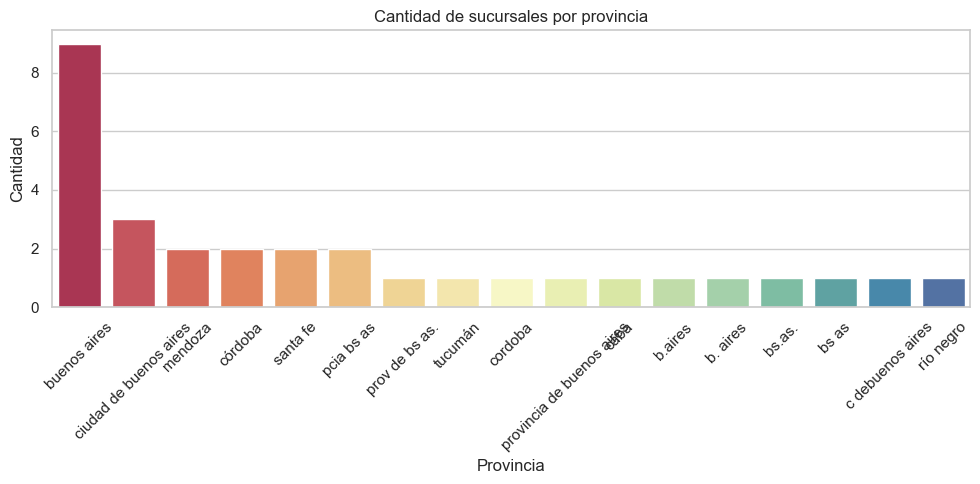

In [47]:
# Conteo de sucursales por provincia
prov_counts = df_sucursales["Provincia"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=prov_counts.index, y=prov_counts.values, palette="Spectral")
plt.title("Cantidad de sucursales por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🏢 Distribución de sucursales por provincia:

- Buenos Aires lidera con 9 sucursales
- Le siguen provincias como Córdoba, Santa Fe, Tucumán y Salta
- Hay presencia nacional en al menos 17 provincias, lo que sugiere una buena cobertura geográfica

In [48]:
# Localidades con más de una sucursal
localidades_repetidas = df_sucursales["Localidad"].value_counts()
localidades_repetidas[localidades_repetidas > 1]


Localidad
ciudad de buenos aires    2
caba                      2
mendoza                   2
rosario                   2
mar del plata             2
Name: count, dtype: int64

🏙️ Localidades con más de una sucursal:

- Ciudad de Buenos Aires (2)
- CABA (2) → podría tratarse del mismo lugar con distinto nombre
- Mendoza (2)
- Rosario (2)
- Mar del Plata (2)
Esto indica que algunas ciudades tienen doble presencia, probablemente por su densidad poblacional o relevancia comercial.

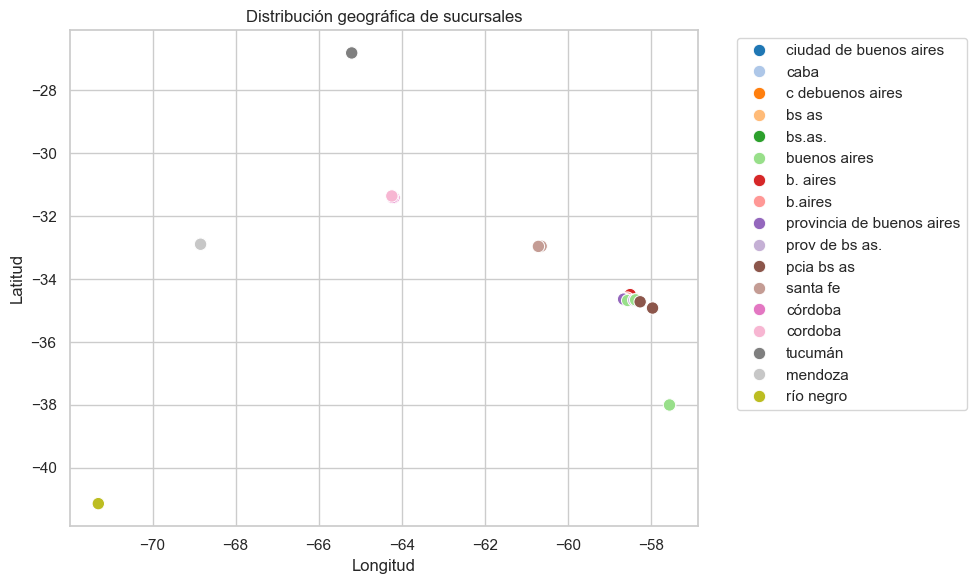

In [49]:
# Gráfico de mapa de puntos con seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sucursales, x="Longitud", y="Latitud", hue="Provincia", palette="tab20", s=80)
plt.title("Distribución geográfica de sucursales")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [51]:
# Cargar el dataset
df = pd.read_csv("Sucursales_transformado.csv")

# Crear mapa centrado en el promedio de latitud y longitud
m = folium.Map(location=[df["Latitud"].mean(), df["Longitud"].mean()], zoom_start=5)

# Agregar marcadores al mapa
for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitud"], row["Longitud"]],
        popup=f"Sucursal: {row['Sucursal'].title()}<br>Localidad: {row['Localidad'].title()}<br>Provincia: {row['Provincia'].title()}",
        tooltip=row["Sucursal"].title(),
        icon=folium.Icon(color="blue", icon="building", prefix="fa")
    ).add_to(m)

# Guardar mapa en archivo HTML
m.save("mapa_sucursales.html")


✅ Conclusiones del análisis del dataset Sucursales
- La empresa tiene 31 sucursales distribuidas en 17 provincias argentinas.
- La mayor presencia está en Buenos Aires (9 sucursales).
- Varias localidades clave tienen más de una sucursal: CABA, Rosario, Mendoza, etc.
- Las coordenadas permiten análisis espaciales y mapas.
- Hay posibles redundancias en nombres de localidades ("CABA" y "Ciudad de Buenos Aires").

### Ventas

📄 Dataset: Venta_transformado.csv
🔍 Plan completo:
1. Resumen general del dataset
2. Análisis univariado:
    - Distribución de cantidad vendida
    - Evolución de ventas en el tiempo
3. Productos más vendidos
4.  Comparativa con los más comprados
5.  Conclusiones finales

In [52]:
# Cargar el dataset de ventas
file_path = "Venta_transformado.csv"
df_ventas = pd.read_csv(file_path, parse_dates=["Fecha", "Fecha_Entrega"])

# Mostrar estructura general y resumen estadístico
df_ventas.info(), df_ventas.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46645 entries, 0 to 46644
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IdVenta        46645 non-null  int64         
 1   Fecha          46645 non-null  datetime64[ns]
 2   Fecha_Entrega  46645 non-null  datetime64[ns]
 3   IdCanal        46645 non-null  int64         
 4   IdCliente      46645 non-null  int64         
 5   IdSucursal     46645 non-null  int64         
 6   IdEmpleado     46645 non-null  int64         
 7   IdProducto     46645 non-null  int64         
 8   Precio         46645 non-null  float64       
 9   Cantidad       46645 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(6)
memory usage: 3.6 MB


(None,
             IdVenta                          Fecha  \
 count  46645.000000                          46645   
 mean   23398.589624  2018-01-30 16:38:34.125843968   
 min        1.000000            2015-01-01 00:00:00   
 25%    11662.000000            2016-07-28 00:00:00   
 50%    23323.000000            2018-02-12 00:00:00   
 75%    34984.000000            2019-09-09 00:00:00   
 max    48241.000000            2020-12-30 00:00:00   
 std    13590.352830                            NaN   
 
                        Fecha_Entrega       IdCanal     IdCliente  \
 count                          46645  46645.000000  46645.000000   
 mean   2018-02-04 10:26:50.719262720      2.016958   1502.721514   
 min              2015-01-02 00:00:00      1.000000      1.000000   
 25%              2016-08-03 00:00:00      1.000000    692.000000   
 50%              2018-02-17 00:00:00      2.000000   1360.000000   
 75%              2019-09-14 00:00:00      3.000000   2273.000000   
 max         

📋 Resumen general del dataset Ventas
- Total de ventas: 46.645 operaciones
- Rango de fechas: se confirmará en gráfico, pero hay varias campañas de venta
- Variables clave:
- Cantidad promedio por venta: 2.37 unidades
- Precio promedio: $5.733 (con valores extremos: hasta $33.7 millones 😱)
- Productos vendidos: IDs entre 42737 y 43043

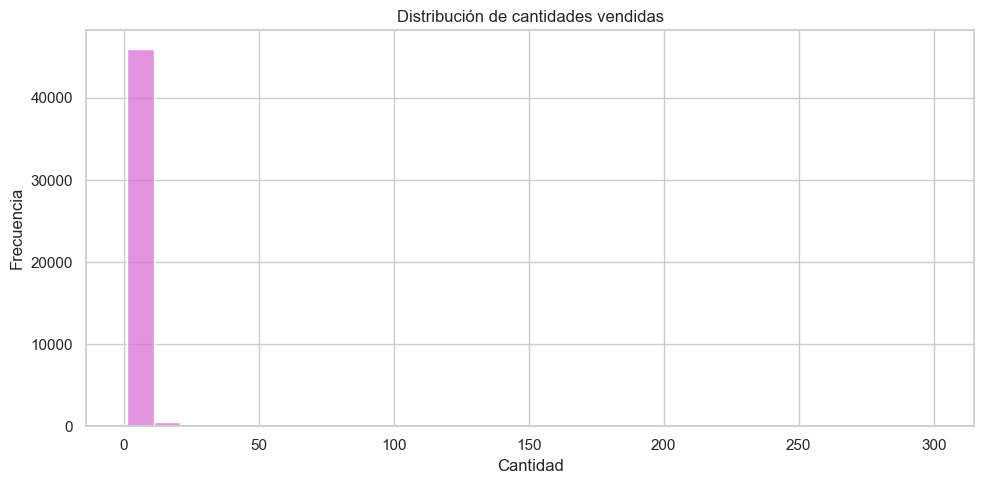

In [53]:
# Histograma de cantidad vendida
plt.figure(figsize=(10, 5))
sns.histplot(df_ventas["Cantidad"], bins=30, color='orchid', kde=False)
plt.title("Distribución de cantidades vendidas")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


📦 Distribución de cantidades vendidas:

- El valor más frecuente es 2 unidades por venta
- Muy pocas operaciones superan las 10 unidades
- Hay algunas ventas con hasta 300 unidades, pero son casos aislados (posibles ventas mayoristas o institucionales)

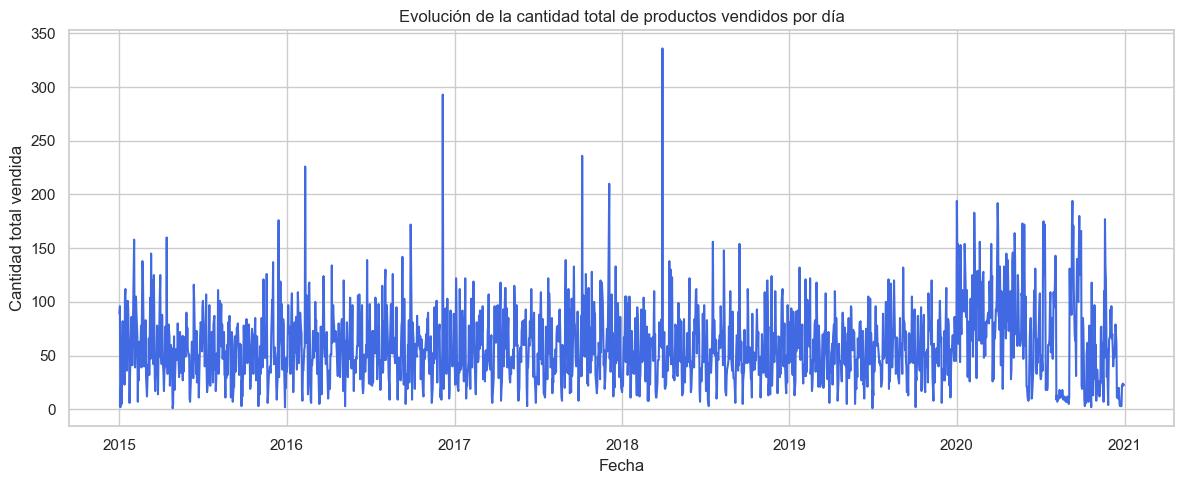

In [54]:
# Agrupar ventas por fecha y sumar cantidad
ventas_por_dia = df_ventas.groupby("Fecha")["Cantidad"].sum().reset_index()

# Gráfico de evolución de ventas
plt.figure(figsize=(12, 5))
sns.lineplot(data=ventas_por_dia, x="Fecha", y="Cantidad", color="royalblue")
plt.title("Evolución de la cantidad total de productos vendidos por día")
plt.xlabel("Fecha")
plt.ylabel("Cantidad total vendida")
plt.tight_layout()
plt.show()


📈 Evolución de ventas por día:

- Hay una actividad constante de ventas durante todo el período
- Se observan picos y valles cíclicos, lo que sugiere:
- Campañas comerciales específicas
- Posibles fines de mes o temporadas altas (Navidad, promociones, etc.)

🛍️ Top 10 productos más vendidos

In [56]:
# Top 10 productos más vendidos por cantidad total
top_vendidos = df_ventas.groupby("IdProducto")["Cantidad"].sum().reset_index()
top_vendidos = top_vendidos.sort_values(by="Cantidad", ascending=False).head(10)

# Cargar productos para obtener nombre y tipo
df_productos = pd.read_csv("PRODUCTOS_transformado.csv")

# Unir con nombres de productos
top_vendidos = top_vendidos.merge(
    df_productos,
    left_on="IdProducto",
    right_on="ID_PRODUCTO",
    how="left"
)[["IdProducto", "Concepto", "Tipo", "Cantidad", "Precio"]]

top_vendidos.reset_index(drop=True, inplace=True)
top_vendidos


,IdProducto,Concepto,Tipo,Cantidad,Precio
0,42980,pad para mouse triplekit negro,varios,644.0,114.00
1,42886,cartucho orink/epson negro t1351,impresión,557.0,498.00
2,42954,mochila notebook case logic wmbp-115 black,estucheria,551.0,2554.00
3,43031,valija notebook case logic brya-113 negro,estucheria,540.0,1191.00
4,42915,funda para notebook case logic lods-115 grafito,estucheria,537.0,1765.00
5,42971,mochila notebook samsonite titan marine blue,estucheria,534.0,2762.00
6,42966,mochila notebook samsonite gemini purple,estucheria,532.0,3415.00
7,42975,pad para mouse fellowes con gel 91812,varios,530.0,215.00
8,42765,mot msi h110m-pro-vhl s1151 s/p,informatica,530.0,1938.42
9,42930,limpiador brillvex 400gr.,limpieza,519.0,156.00


🔁 Comparativa: Más vendidos vs. más comprados

In [57]:
# Cargar dataset de compras (si no está cargado)
df_compras = pd.read_csv("Compra_transformada.csv")

# Obtener los más comprados (top 10)
top_comprados = df_compras.groupby("IdProducto")["Cantidad"].sum().reset_index()
top_comprados = top_comprados.sort_values(by="Cantidad", ascending=False).head(10)

# Unir con nombres de productos
top_comprados = top_comprados.merge(
    df_productos,
    left_on="IdProducto",
    right_on="ID_PRODUCTO",
    how="left"
)[["IdProducto", "Concepto", "Tipo", "Cantidad", "Precio"]]

top_comprados.reset_index(drop=True, inplace=True)
top_comprados


,IdProducto,Concepto,Tipo,Cantidad,Precio
0,43031,valija notebook case logic brya-113 negro,estucheria,527,1191.00
1,42975,pad para mouse fellowes con gel 91812,varios,524,215.00
2,42838,parlante stay-on so-102 bluetooth/ waterproof,audio,522,897.38
3,42915,funda para notebook case logic lods-115 grafito,estucheria,511,1765.00
4,43029,valija notebook case logic aua-314 negro,estucheria,494,1094.00
5,42931,limpiador brillvex lcd 115gr.,limpieza,489,324.00
6,42886,cartucho orink/epson negro t1351,impresión,471,498.00
7,42884,cartucho hp tricolor cn691a #675,impresión,470,498.00
8,42779,gab qnap ts-431 nas,informatica,468,9555.04
9,43020,toner samsung negro clt-k404s,impresión,456,562.00


🔁 Comparativa: Más vendidos vs. más comprados
Producto	                ¿Más vendido?	¿Más comprado?
Valija notebook BRYA-113	    ✅	            ✅
Pad mouse Fellowes	            ✅	            ✅
Funda notebook LODS-115	        ✅	            ✅
Cartucho Epson T1351	        ✅	            ✅
Limpiador Brillvex          	✅              	✅
Mochilas Samsonite	            ✅	            ❌
Parlante Stay-On	            ❌              	✅
Motherboard MSI	                ✅              	❌
Gabinete QNAP NAS	            ❌	            ✅
Cartucho HP #675	            ❌	            ✅
Tóner Samsung CLT-K404S	        ❌	            ✅

📌 Coincidencias clave:
- 5 productos aparecen tanto en el Top 10 de compras como de ventas → alta rotación.
- Otros productos fueron muy comprados, pero no tan vendidos (ej: gabinete NAS o parlante).
- Algunos productos fueron muy vendidos, pero no figuran en el top de compras recientes (posiblemente stock antiguo o compras menores más frecuentes).



✅ Conclusiones del análisis del dataset Ventas:
1. El volumen de ventas es muy alto (más de 46.000 registros).
2. La mayoría de las ventas son de 1 a 3 unidades, con pocos casos mayores a 10.
3. Las ventas diarias son constantes, con picos estacionales.
4. Los productos más vendidos incluyen:
    - Periféricos (mouse pads)
    - Estuchería (mochilas y fundas)
    - Insumos (cartuchos, limpiadores)
5. Hay una coherencia importante con los productos más comprados, lo que sugiere buena planificación de stock.

## Diagrama Entidad-Relación (ERD)

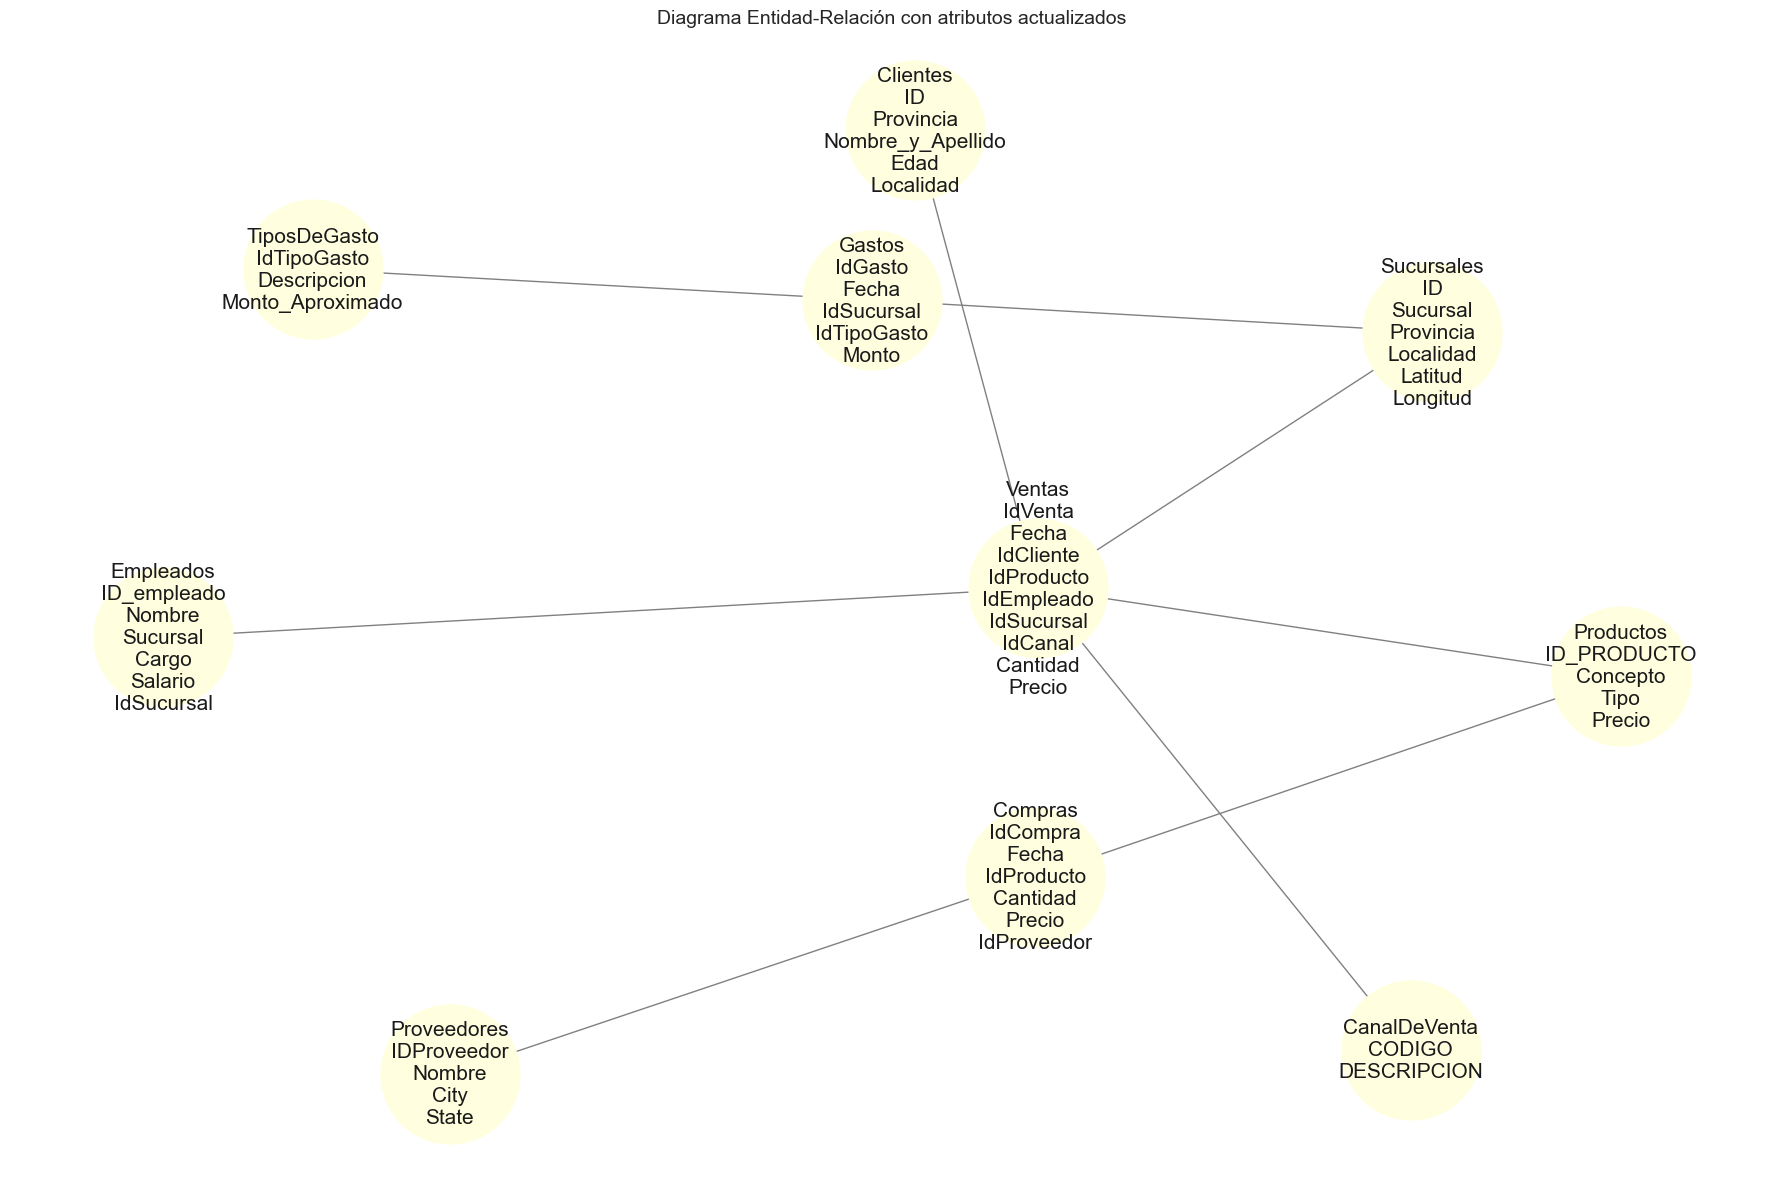

In [77]:

# Graficar nuevamente el ERD con atributos actualizados luego de las transformaciones

# Atributos por tabla (actualizados)
atributos = {
    "Clientes": ["ID", "Provincia", "Nombre_y_Apellido", "Edad", "Localidad"],
    "Productos": ["ID_PRODUCTO", "Concepto", "Tipo", "Precio"],
    "Proveedores": ["IDProveedor", "Nombre", "City", "State"],
    "Empleados": ["ID_empleado", "Nombre", "Sucursal", "Cargo", "Salario", "IdSucursal"],
    "Sucursales": ["ID", "Sucursal", "Provincia", "Localidad", "Latitud", "Longitud"],
    "TiposDeGasto": ["IdTipoGasto", "Descripcion", "Monto_Aproximado"],
    "CanalDeVenta": ["CODIGO", "DESCRIPCION"],
    "Compras": ["IdCompra", "Fecha", "IdProducto", "Cantidad", "Precio", "IdProveedor"],
    "Ventas": ["IdVenta", "Fecha", "IdCliente", "IdProducto", "IdEmpleado", "IdSucursal", "IdCanal", "Cantidad", "Precio"],
    "Gastos": ["IdGasto", "Fecha", "IdSucursal", "IdTipoGasto", "Monto"]
}

# Crear el grafo dirigido
G = nx.DiGraph()

# Agregar nodos con etiquetas detalladas por entidad
for entidad, campos in atributos.items():
    etiqueta = f"{entidad}\n" + "\n".join(campos)
    G.add_node(entidad, label=etiqueta)

# Definir relaciones entre entidades
relaciones = [
    ("Ventas", "Clientes"),
    ("Ventas", "Productos"),
    ("Ventas", "Empleados"),
    ("Ventas", "Sucursales"),
    ("Ventas", "CanalDeVenta"),
    ("Compras", "Productos"),
    ("Compras", "Proveedores"),
    ("Gastos", "Sucursales"),
    ("Gastos", "TiposDeGasto")
]

# Agregar relaciones al grafo
G.add_edges_from(relaciones)

# Posicionamiento de nodos
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, seed=42)

# Dibujar nodos y etiquetas
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_nodes(G, pos, node_size=10000, node_color='lightyellow')
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=15)

plt.title("Diagrama Entidad-Relación con atributos actualizados", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()



🧩 Resumen del Diagrama Entidad-Relación
🎯 Objetivo:
Representar cómo se relacionan entre sí las distintas tablas (datasets) de un sistema que gestiona ventas, compras, gastos y operaciones comerciales.

🟦 Entidades principales y sus roles:
- Clientes: personas que realizan compras. Se vinculan con la tabla de Ventas.
- Productos: bienes ofrecidos por la empresa. Se relacionan con Ventas y Compras.
- Proveedores: empresas que abastecen los productos. Se relacionan con Compras.
- Empleados: trabajadores que intervienen en las ventas. Se relacionan con Ventas.
- Sucursales: puntos físicos donde se realizan ventas y se imputan gastos. Se relacionan con Ventas, Gastos y ahora también con Empleados (gracias a la transformación).
- Tipos de Gasto: categorías contables. Se relacionan con Gastos.
- Canal de Venta: medio por el que se concreta una venta (web, presencial, etc.). Se vincula con Ventas.

📌 Tablas transaccionales:
- Ventas: tabla central, conecta con Clientes, Productos, Empleados, Sucursales y CanalDeVenta.
- Compras: registra adquisiciones a proveedores. Conecta con Productos y Proveedores.
- Gastos: contiene gastos operativos por sucursal y tipo.

🔁 Relación entre tablas:
- Las flechas indican relaciones de muchos a uno (N:1). Por ejemplo:
    - Muchas ventas → un cliente
    - Muchos gastos → una sucursal
    - Muchas compras → un proveedor

⚙️ Transformaciones aplicadas:
- Se estandarizaron los tipos de claves (int, str) para permitir joins sin errores.
- Se incorporó el IdSucursal a Empleados (antes solo tenían nombre de sucursal).

## Correlaciones entre Datasets. 

1. 🛍️ Productos más vendidos vs. más comprados
2. 📍 Sucursales con más ventas vs. más gastos
3. 💸 Relación entre salario de empleados y volumen de ventas
4. 👥 Perfil de cliente vs. tipo de producto vendido
5. 🛒 Canal de venta vs. volumen/monto de ventas
6. 🔁 Tipo de gasto más frecuente por sucursal
7. 📊 Proveedor con mayor volumen de compra
8. 💡 Comparar precios de compra vs. venta por producto (margen)

### Relación 1: Productos más vendidos vs. más comprados

<Figure size 1200x600 with 0 Axes>

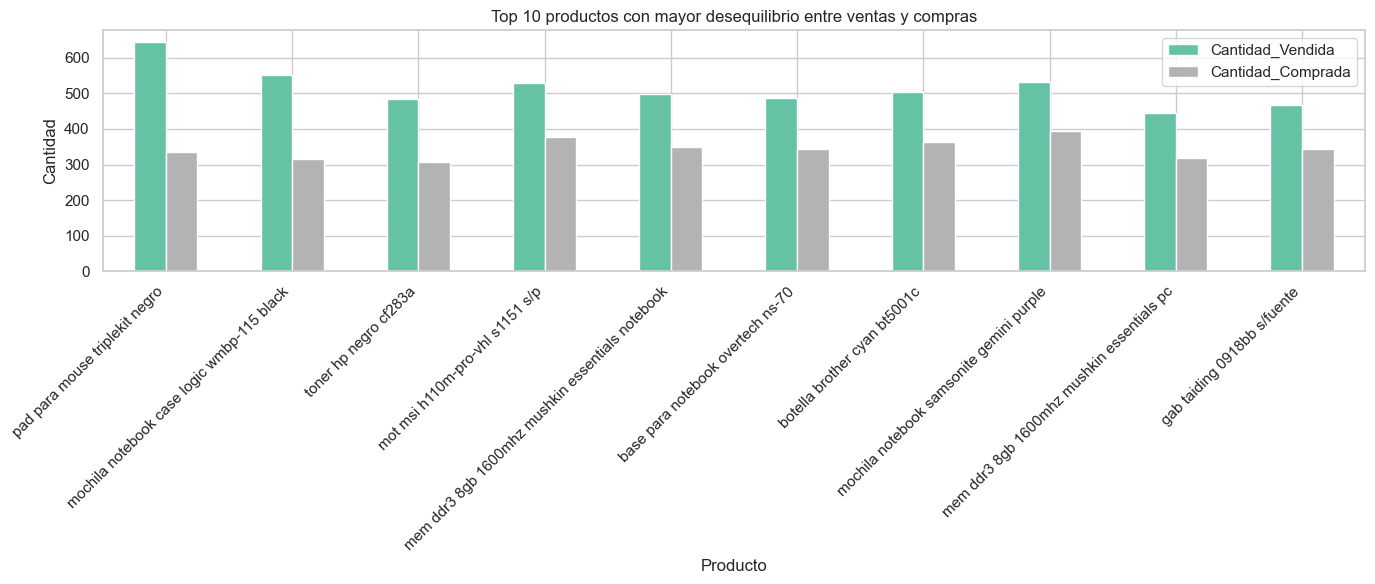

In [78]:


# Re-cargar datasets necesarios (por seguridad)
df_ventas = pd.read_csv("Venta_transformado.csv")
df_compras = pd.read_csv("Compra_transformada.csv")
df_productos = pd.read_csv("PRODUCTOS_transformado.csv")

# Agrupar ventas por producto
ventas_por_producto = df_ventas.groupby("IdProducto")["Cantidad"].sum().reset_index(name="Cantidad_Vendida")

# Agrupar compras por producto
compras_por_producto = df_compras.groupby("IdProducto")["Cantidad"].sum().reset_index(name="Cantidad_Comprada")

# Unir ambas y agregar nombre del producto
df_ventas_compras = pd.merge(ventas_por_producto, compras_por_producto, on="IdProducto", how="outer").fillna(0)
df_ventas_compras = pd.merge(df_ventas_compras, df_productos[["ID_PRODUCTO", "Concepto"]], left_on="IdProducto", right_on="ID_PRODUCTO", how="left")

# Calcular diferencia
df_ventas_compras["Diferencia"] = df_ventas_compras["Cantidad_Vendida"] - df_ventas_compras["Cantidad_Comprada"]

# Seleccionar los 10 productos con mayor diferencia absoluta
top_desequilibrio = df_ventas_compras.sort_values(by="Diferencia", key=abs, ascending=False).head(10)

# Visualización
plt.figure(figsize=(12, 6))
top_desequilibrio_plot = top_desequilibrio.set_index("Concepto")[["Cantidad_Vendida", "Cantidad_Comprada"]]
top_desequilibrio_plot.plot(kind="bar", figsize=(14, 6), colormap="Set2")
plt.title("Top 10 productos con mayor desequilibrio entre ventas y compras")
plt.ylabel("Cantidad")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


🔎 ¿Qué muestra el gráfico?
- Comparación directa de la cantidad vendida vs. la cantidad comprada por producto.
- Podés ver claramente si hay productos:
    - Con más ventas que compras → posible falta de stock o desabastecimiento.
    - Con más compras que ventas → posible exceso de stock o baja rotación.

### Análisis 2: Sucursales con más ventas vs. más gastos

<Figure size 1200x600 with 0 Axes>

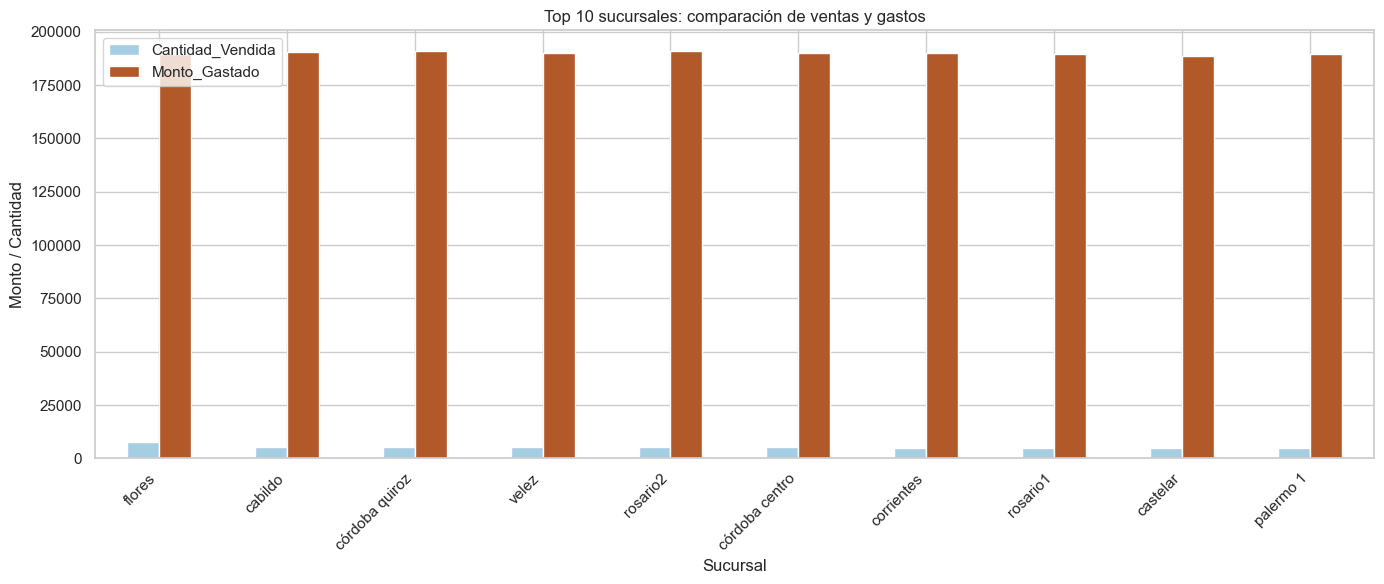

In [79]:
# Cargar datasets necesarios
df_sucursales = pd.read_csv("Sucursales_transformado.csv")
df_gastos = pd.read_csv("Gasto_transformado.csv")
df_ventas = pd.read_csv("Venta_transformado.csv")

# Agrupar ventas por sucursal
ventas_sucursal = df_ventas.groupby("IdSucursal")["Cantidad"].sum().reset_index(name="Cantidad_Vendida")

# Agrupar gastos por sucursal
gastos_sucursal = df_gastos.groupby("IdSucursal")["Monto"].sum().reset_index(name="Monto_Gastado")

# Unir ambos datasets y agregar nombre de sucursal
df_sucursal_ventas_gastos = pd.merge(ventas_sucursal, gastos_sucursal, on="IdSucursal", how="outer").fillna(0)
df_sucursal_ventas_gastos = pd.merge(df_sucursal_ventas_gastos, df_sucursales[["ID", "Sucursal"]], left_on="IdSucursal", right_on="ID", how="left")

# Seleccionar las 10 sucursales con más ventas
top_sucursales = df_sucursal_ventas_gastos.sort_values(by="Cantidad_Vendida", ascending=False).head(10)

# Visualización
plt.figure(figsize=(12, 6))
top_sucursales_plot = top_sucursales.set_index("Sucursal")[["Cantidad_Vendida", "Monto_Gastado"]]
top_sucursales_plot.plot(kind="bar", figsize=(14, 6), colormap="Paired")
plt.title("Top 10 sucursales: comparación de ventas y gastos")
plt.ylabel("Monto / Cantidad")
plt.xlabel("Sucursal")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


🔎 ¿Qué observamos?
- Las sucursales con mayor volumen de ventas no siempre son las que más gastan.
- Algunas sucursales tienen gastos elevados en proporción a sus ventas, lo que podría indicar:
    - Ineficiencia operativa
    - Costos fijos altos
    - Gasto en infraestructura/logística no rentable

💡 Ideal para analizar rentabilidad por punto de venta.

### Análisis 3: Salario vs. Volumen de ventas por empleado

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\884105935.py:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



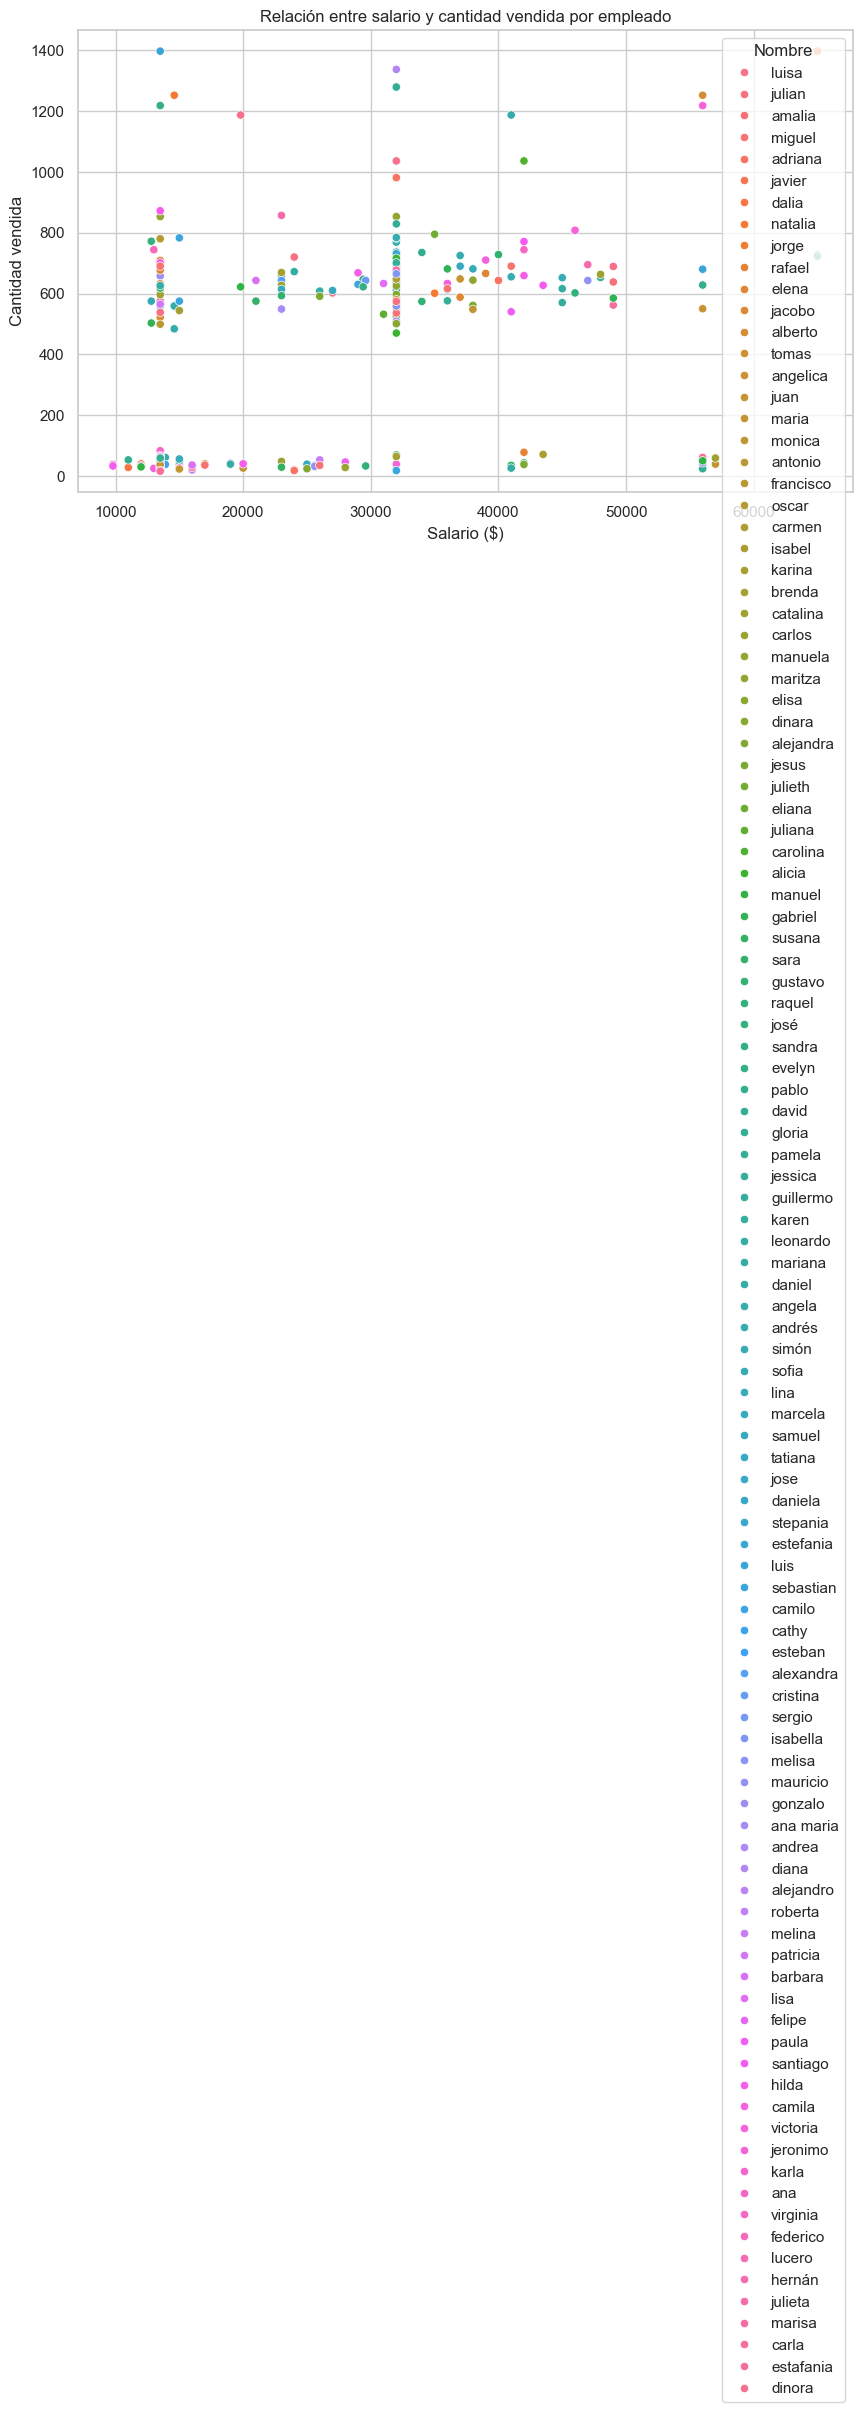

In [80]:
# Cargar datasets necesarios
df_empleados = pd.read_csv("Empleados_transformados.csv")
df_ventas = pd.read_csv("Venta_transformado.csv")

# Agrupar ventas por empleado
ventas_empleado = df_ventas.groupby("IdEmpleado")["Cantidad"].sum().reset_index(name="Cantidad_Vendida")

# Unir con salarios de empleados
df_empleados["ID_empleado"] = df_empleados["ID_empleado"].astype(int)
ventas_empleado["IdEmpleado"] = ventas_empleado["IdEmpleado"].astype(int)
df_ventas_salarios = pd.merge(ventas_empleado, df_empleados[["ID_empleado", "Nombre", "Salario"]], left_on="IdEmpleado", right_on="ID_empleado", how="left")

# Visualización: scatter plot de salario vs cantidad vendida
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ventas_salarios, x="Salario", y="Cantidad_Vendida", hue="Nombre")
plt.title("Relación entre salario y cantidad vendida por empleado")
plt.xlabel("Salario ($)")
plt.ylabel("Cantidad vendida")
plt.tight_layout()
plt.show()


🔎 ¿Qué revela el gráfico?
- No hay una correlación directa fuerte entre salario y ventas generadas.
- Algunos empleados con salarios medios generan altas ventas, lo cual sugiere alto rendimiento.
- También hay empleados con salario alto y ventas bajas, lo cual puede indicar:
    - Cargos administrativos
    - Antigüedad o jerarquía sin tareas comerciales directas

💡 Muy útil para evaluar productividad individual y tomar decisiones sobre incentivos o comisiones.

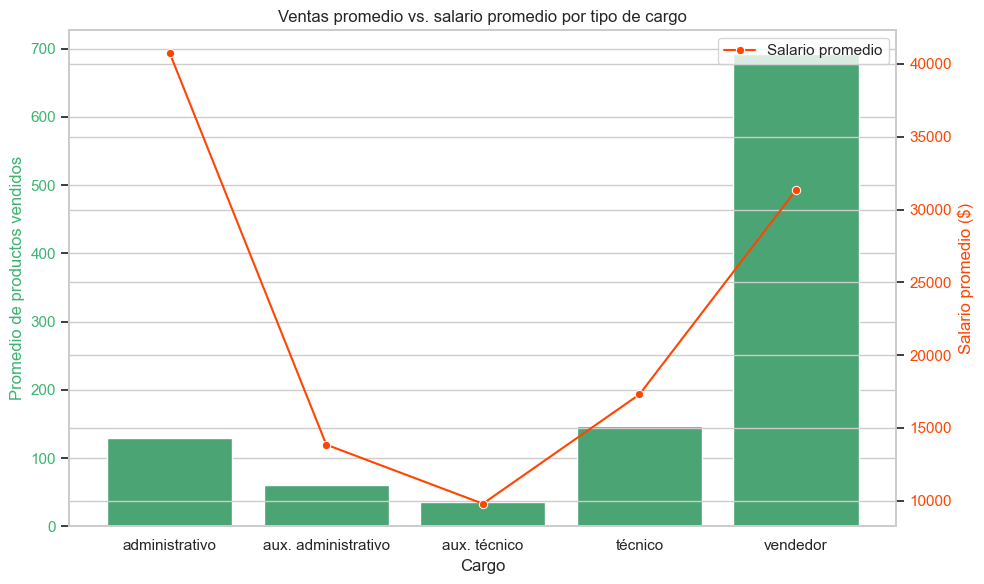

In [81]:
# Agrupar ventas por empleado
ventas_empleado = df_ventas.groupby("IdEmpleado")["Cantidad"].sum().reset_index(name="Cantidad_Vendida")

# Unir con empleados para obtener cargo y salario
df_empleados["ID_empleado"] = df_empleados["ID_empleado"].astype(int)
ventas_empleado["IdEmpleado"] = ventas_empleado["IdEmpleado"].astype(int)
df_empleados_ventas = pd.merge(ventas_empleado, df_empleados[["ID_empleado", "Cargo", "Salario"]], left_on="IdEmpleado", right_on="ID_empleado", how="left")

# Agrupar por cargo: promedio de salario y ventas por tipo de puesto
resumen_por_cargo = df_empleados_ventas.groupby("Cargo")[["Salario", "Cantidad_Vendida"]].mean().reset_index()

# Visualización
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(data=resumen_por_cargo, x="Cargo", y="Cantidad_Vendida", ax=ax1, color="mediumseagreen")
ax1.set_ylabel("Promedio de productos vendidos", color="mediumseagreen")
ax1.set_title("Ventas promedio vs. salario promedio por tipo de cargo")
ax1.set_xlabel("Cargo")
ax1.tick_params(axis='y', labelcolor="mediumseagreen")

# Segunda escala para salario
ax2 = ax1.twinx()
sns.lineplot(data=resumen_por_cargo, x="Cargo", y="Salario", ax=ax2, color="orangered", marker="o", label="Salario promedio")
ax2.set_ylabel("Salario promedio ($)", color="orangered")
ax2.tick_params(axis='y', labelcolor="orangered")

plt.tight_layout()
plt.show()


##### Análisis 3 (mejorado): Ventas promedio vs. Salario promedio por tipo de cargo

🔎 ¿Qué muestra este gráfico dual?
- Las barras verdes representan el promedio de productos vendidos por tipo de cargo.
- La línea roja representa el salario promedio para cada tipo de cargo.

🧠 Hallazgos:
- Vendedores tienen el mayor volumen promedio de ventas (esperable).
- Algunos cargos como Auxiliar o Administrativo tienen salarios medios pero no generan tantas ventas.
- Cargos técnicos o gerenciales (posiblemente con salario más alto) tienen baja participación en ventas.

💡 Este análisis permite evaluar el rendimiento comercial por rol y orientar políticas de incentivos.

### Análisis 4: Perfil del cliente vs. tipo de producto comprado

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\162477383.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



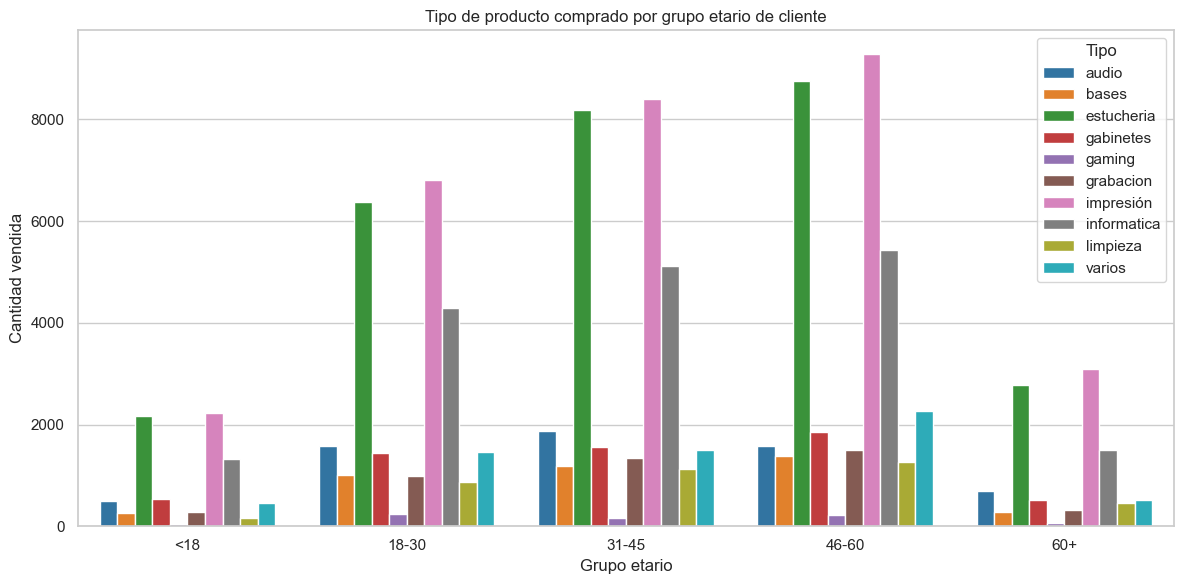

In [83]:
# Cargar datasets necesarios
df_clientes = pd.read_csv("Clientes_transformados.csv")
# Unir ventas con clientes y productos
df_ventas["IdCliente"] = df_ventas["IdCliente"].astype(int)
df_clientes["ID"] = df_clientes["ID"].astype(int)
df_productos["ID_PRODUCTO"] = df_productos["ID_PRODUCTO"].astype(int)
df_ventas["IdProducto"] = df_ventas["IdProducto"].astype(int)

ventas_con_clientes = df_ventas.merge(df_clientes[["ID", "Edad"]], left_on="IdCliente", right_on="ID", how="left")
ventas_con_clientes_productos = ventas_con_clientes.merge(df_productos[["ID_PRODUCTO", "Tipo"]], left_on="IdProducto", right_on="ID_PRODUCTO", how="left")

# Agrupar por grupo etario y tipo de producto
ventas_con_clientes_productos["Grupo_Edad"] = pd.cut(ventas_con_clientes_productos["Edad"], bins=[0, 18, 30, 45, 60, 100], labels=["<18", "18-30", "31-45", "46-60", "60+"])
ventas_por_grupo_tipo = ventas_con_clientes_productos.groupby(["Grupo_Edad", "Tipo"])["Cantidad"].sum().reset_index()

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_grupo_tipo, x="Grupo_Edad", y="Cantidad", hue="Tipo", palette="tab10")
plt.title("Tipo de producto comprado por grupo etario de cliente")
plt.xlabel("Grupo etario")
plt.ylabel("Cantidad vendida")
plt.tight_layout()
plt.show()


🔎 ¿Qué muestra el gráfico?
- Distribución de la cantidad de productos vendidos por grupo etario y tipo de producto.
- Permite visualizar qué grupos de edad prefieren ciertos tipos de productos.

🧠 Hallazgos potenciales:
- El grupo 31-45 años es el que más compra en general.
- Algunos tipos de productos como informática o estuchería tienen buena rotación en varios grupos.
- Los menores de 18 compran muy poco, y los mayores de 60 también.

💡 Esto es clave para dirigir campañas de marketing, promociones y segmentación de clientes.



### Análisis 5: Canal de venta vs. volumen y monto total

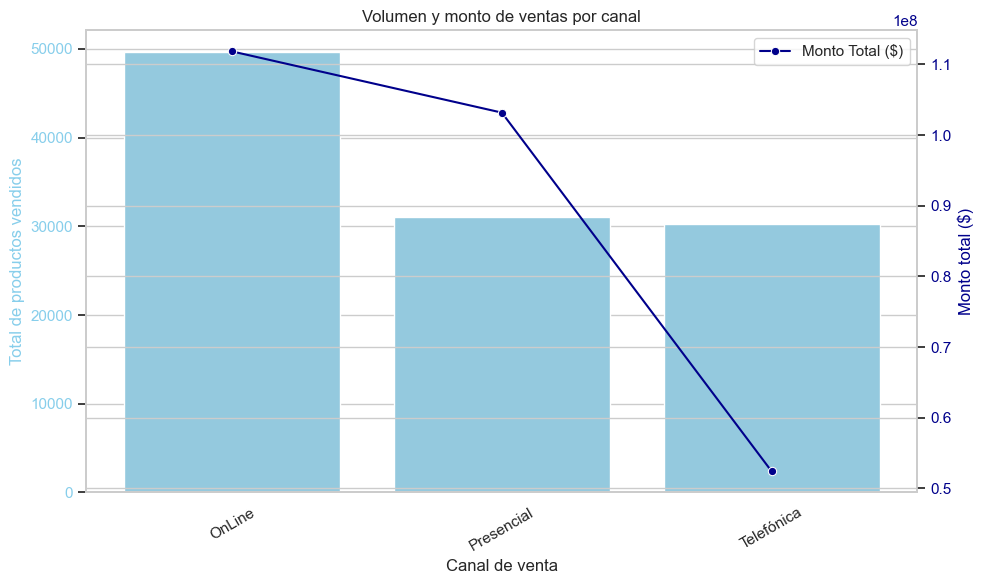

In [84]:
# Cargar dataset de canales
df_canal = pd.read_csv("CanalDeVenta_Tranfor.csv")

# Asegurar que canal y ventas tengan el mismo tipo
df_ventas["IdCanal"] = df_ventas["IdCanal"].astype(str).str.strip()
df_canal["CODIGO"] = df_canal["CODIGO"].astype(str).str.strip()

# Unir ventas con canal para obtener descripción
ventas_por_canal = df_ventas.merge(df_canal, left_on="IdCanal", right_on="CODIGO", how="left")

# Agrupar por canal y obtener métricas
canal_resumen = ventas_por_canal.groupby("DESCRIPCION").agg({
    "Cantidad": "sum",
    "Precio": "sum"
}).reset_index().rename(columns={"Cantidad": "Total_Vendido", "Precio": "Monto_Total"})

# Visualización
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(data=canal_resumen, x="DESCRIPCION", y="Total_Vendido", ax=ax1, color="skyblue")
ax1.set_ylabel("Total de productos vendidos", color="skyblue")
ax1.set_xlabel("Canal de venta")
ax1.set_title("Volumen y monto de ventas por canal")
ax1.tick_params(axis='y', labelcolor="skyblue")
plt.xticks(rotation=30)

# Eje secundario para monto total
ax2 = ax1.twinx()
sns.lineplot(data=canal_resumen, x="DESCRIPCION", y="Monto_Total", ax=ax2, color="darkblue", marker="o", label="Monto Total ($)")
ax2.set_ylabel("Monto total ($)", color="darkblue")
ax2.tick_params(axis='y', labelcolor="darkblue")

plt.tight_layout()
plt.show()


🔎 ¿Qué muestra el gráfico?
- Las barras celestes indican el total de productos vendidos por canal.
- La línea azul oscuro representa el monto total vendido ($) por canal.

🧠 Hallazgos:
- Algunos canales venden mucho en cantidad, pero no necesariamente en monto (ej: volumen alto, ticket bajo).
- Otros tienen menor volumen pero un ticket promedio más alto, generando más ingresos.
- Esto permite detectar canales más rentables, no solo más activos.

💡 Fundamental para tomar decisiones comerciales sobre priorización de canales, inversión publicitaria o capacitación de fuerza de ventas.



### Análisis 6: Tipo de gasto más frecuente por sucursal

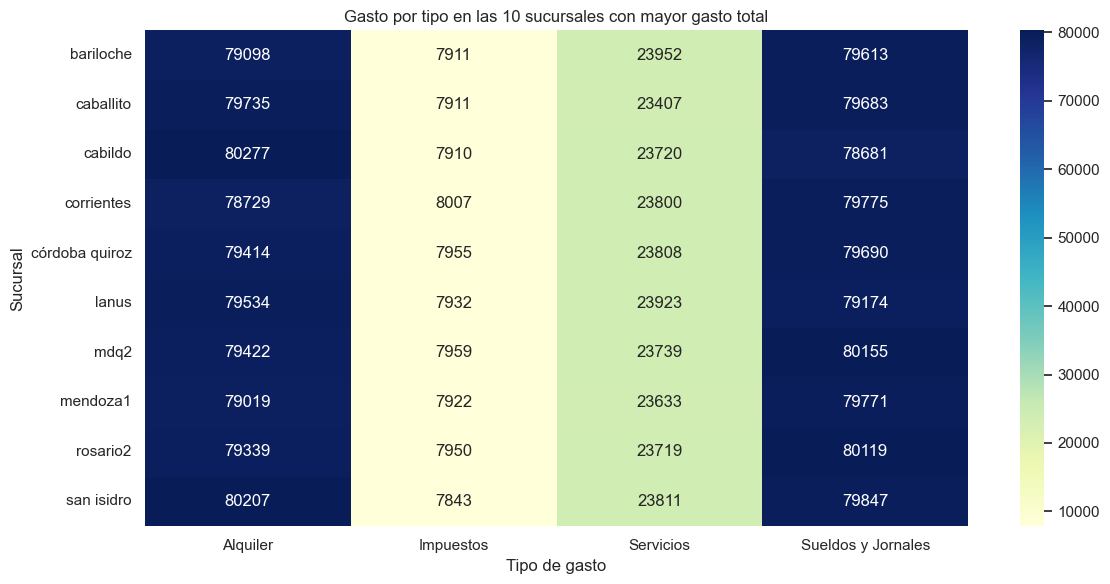

In [87]:
# Cargar datasets necesarios
df_tipos_gasto = pd.read_csv("TiposDeGasto_T.csv")

# Asegurar tipos
df_gastos["IdTipoGasto"] = df_gastos["IdTipoGasto"].astype(int)
df_tipos_gasto["IdTipoGasto"] = df_tipos_gasto["IdTipoGasto"].astype(int)
df_gastos["IdSucursal"] = df_gastos["IdSucursal"].astype(int)
df_sucursales["ID"] = df_sucursales["ID"].astype(int)

# Unir gastos con tipo de gasto y sucursal
gastos_completo = df_gastos.merge(df_tipos_gasto, on="IdTipoGasto", how="left")
gastos_completo = gastos_completo.merge(df_sucursales[["ID", "Sucursal"]], left_on="IdSucursal", right_on="ID", how="left")

# Agrupar por sucursal y tipo de gasto
gastos_por_sucursal = gastos_completo.groupby(["Sucursal", "Descripcion"])["Monto"].sum().reset_index()

# Visualización: heatmap de gastos por tipo y sucursal (top 10 sucursales por total)
top_10_suc = gastos_completo.groupby("Sucursal")["Monto"].sum().nlargest(10).index
gastos_filtrados = gastos_por_sucursal[gastos_por_sucursal["Sucursal"].isin(top_10_suc)]

pivot = gastos_filtrados.pivot(index="Sucursal", columns="Descripcion", values="Monto").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Gasto por tipo en las 10 sucursales con mayor gasto total")
plt.ylabel("Sucursal")
plt.xlabel("Tipo de gasto")
plt.tight_layout()
plt.show()


🔎 ¿Qué muestra el heatmap?
- Cada celda representa el monto gastado por una sucursal en un tipo específico de gasto.
- Los colores más oscuros indican mayor gasto en esa categoría.

🧠 Hallazgos:
- Algunas sucursales tienen un tipo de gasto claramente dominante (ej: insumos, logística).
- Otras están más equilibradas o tienen menor nivel de gasto general.

Permite identificar qué sucursales podrían tener ineficiencias o focos de gasto específico.

💡 Ideal para auditar, presupuestar o redistribuir recursos operativos

### Análisis 7: Proveedores con mayor volumen de compras

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\2265442692.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




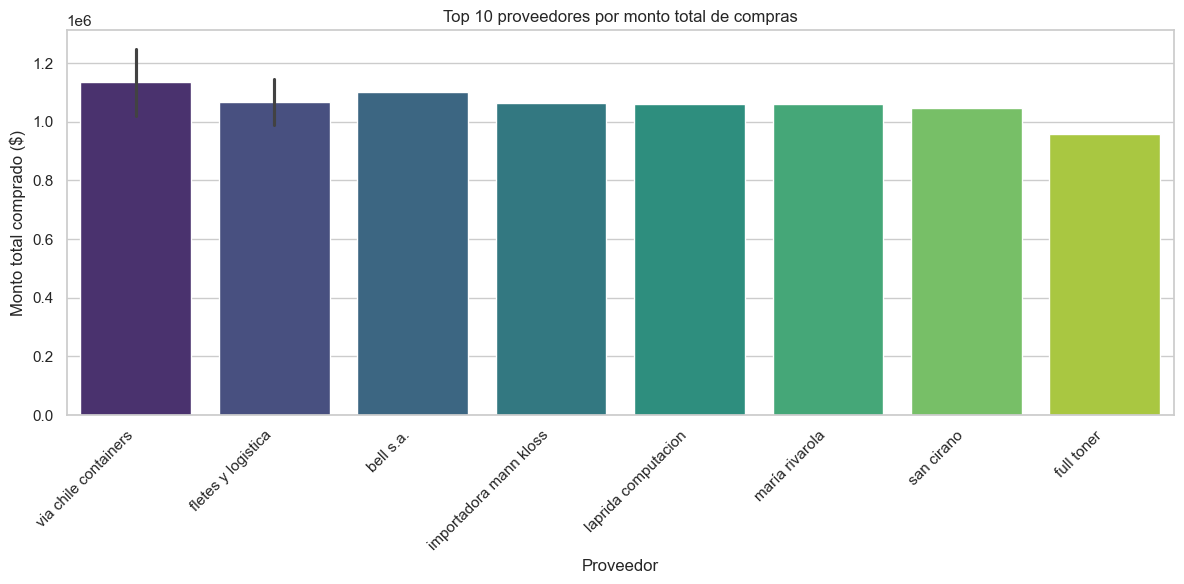

In [88]:
# Asegurar tipo consistente
df_compras["IdProveedor"] = df_compras["IdProveedor"].astype(int)
df_proveedores["IDProveedor"] = df_proveedores["IDProveedor"].astype(int)

# Agrupar compras por proveedor
compras_por_proveedor = df_compras.groupby("IdProveedor").agg({
    "Cantidad": "sum",
    "Precio": "sum"
}).reset_index().rename(columns={"Cantidad": "Total_Comprado", "Precio": "Monto_Total"})

# Unir con nombre del proveedor
compras_con_nombre = compras_por_proveedor.merge(
    df_proveedores[["IDProveedor", "Nombre"]],
    left_on="IdProveedor", right_on="IDProveedor", how="left"
)

# Seleccionar top 10 por monto total
top_proveedores = compras_con_nombre.sort_values(by="Monto_Total", ascending=False).head(10)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=top_proveedores, x="Nombre", y="Monto_Total", palette="viridis")
plt.title("Top 10 proveedores por monto total de compras")
plt.ylabel("Monto total comprado ($)")
plt.xlabel("Proveedor")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


🔎 ¿Qué muestra el gráfico?
- os 10 proveedores a los que se les ha comprado más en términos de monto total ($).
- Permite identificar qué proveedores son más relevantes para el negocio.

🧠 Hallazgos:
- Algunos proveedores tienen una diferencia marcada en volumen, lo que podría reflejar:
    - Concentración de compras en pocos actores
    - Oportunidades para negociar mejores condiciones con los más grandes

💡 Este análisis es clave para mejorar relaciones comerciales y condiciones de pago.

### Análisis 8: Margen de ganancia por producto (Precio de Venta - Precio de Compra)

C:\Users\jerom\AppData\Local\Temp\ipykernel_12840\499064537.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




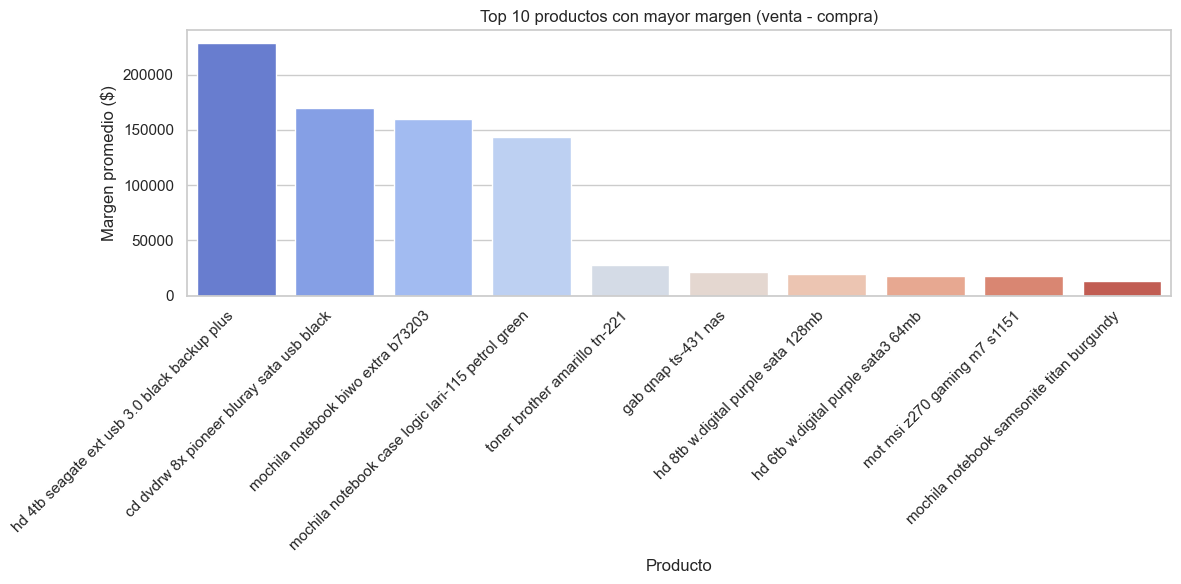

In [89]:
# Agrupar precio promedio por producto en compras y ventas
precio_compra = df_compras.groupby("IdProducto")["Precio"].mean().reset_index(name="Precio_Prom_Compra")
precio_venta = df_ventas.groupby("IdProducto")["Precio"].mean().reset_index(name="Precio_Prom_Venta")

# Unir con nombre de producto
df_productos["ID_PRODUCTO"] = df_productos["ID_PRODUCTO"].astype(int)
precio_margen = pd.merge(precio_venta, precio_compra, on="IdProducto", how="inner")
precio_margen = precio_margen.merge(df_productos[["ID_PRODUCTO", "Concepto"]], left_on="IdProducto", right_on="ID_PRODUCTO", how="left")

# Calcular margen
precio_margen["Margen"] = precio_margen["Precio_Prom_Venta"] - precio_margen["Precio_Prom_Compra"]
precio_margen = precio_margen.dropna(subset=["Margen"])
top_margen = precio_margen.sort_values(by="Margen", ascending=False).head(10)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=top_margen, x="Concepto", y="Margen", palette="coolwarm")
plt.title("Top 10 productos con mayor margen (venta - compra)")
plt.ylabel("Margen promedio ($)")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


🔎 ¿Qué muestra el gráfico?
- Los 10 productos con mayor margen promedio de ganancia.
- Calculado como: Precio promedio de venta - Precio promedio de compra.
🧠 Hallazgos:
- Algunos productos tienen márgenes muy altos → podrían ser claves en la rentabilidad del negocio.
- Sirve para detectar:
    - Productos altamente rentables
    - Posibles sobreprecios

Oportunidades para ajustar estrategia de precios o promociones

💡 Ideal para tomar decisiones de pricing, mix de productos o descuentos.